## Objective:   To classify the patients into the respective labels using the attributes from their voice recordings

### Step 1: Importing necessary Libraries

In [2]:
import numpy as np # For doing algebric/mathematical calculation/operations.
import pandas as pd# For creating, analyzing/dataprocessing dataframes.
import matplotlib.pyplot as plt # For visualization of data.
import seaborn as sns           # For visualization of data.
from sklearn.preprocessing import OneHotEncoder #To convert the categorical into binary vectors.
from sklearn.preprocessing import StandardScaler  #To Normalize the data without changing the shape of the distribution.
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split #To split the data to do cross validation of the model. 
from statsmodels.stats.outliers_influence import variance_inflation_factor #To test the multicollinearity between the features. 
import statsmodels.api as sm #To import necessary statical functions like lofit to do Logistic Regresion.
from sklearn import metrics #To do the performance test on the models like accuracy test using score function and also get other performance measures like precision, recall by obtaining classification report and confussion matrix. 
from sklearn.linear_model import LogisticRegression #For performing Logistic Regression using sci-kit learn package.
from sklearn.neighbors import KNeighborsClassifier #For using KNN algorithm.
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes
from sklearn.metrics import accuracy_score #To measure the performance of the model.
from sklearn.metrics import recall_score #To obtain the recall score of the model.
from sklearn.metrics import roc_curve #To obtain fpr,tpr and thresholds also to plot ROC Curve.
from sklearn.metrics import roc_auc_score #To Fetch ROC AUC value
from sklearn.metrics import precision_recall_curve #Gives the precison, recall and thresholds also to Precion-Recall plot
from sklearn.metrics import f1_score # To Get harmonic mean of Precision and Recall.
from sklearn.metrics import auc # Gives the AUC of Precision and Recall.
from sklearn.pipeline import make_pipeline #To create pipeline of estimators and Classifiers.
from sklearn.model_selection import GridSearchCV #For tuning the hyperparameters.
from sklearn.tree import DecisionTreeClassifier # To Crete Decission Tree Classifier
from sklearn import tree #To create tree visualization
from sklearn.ensemble import RandomForestClassifier #To  create model using Random Forest algorithm.
from sklearn.ensemble import BaggingClassifier #To create Bagging classifier.
from sklearn.ensemble import AdaBoostClassifier # Importing inbuilt AdaBoosting Classifier.
from sklearn.svm import SVC # To create model using Support Vector Classifier.
from mlxtend.classifier import StackingClassifier # To do Stacking of classifier and build a meta-classifier.
import graphviz # For visualizing the decission Tree
import warnings
warnings.filterwarnings(action = 'ignore') #To eleminate future warnings.

# It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of records, structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. Mention a few comments in this regard (5 points)

### Step 2: Exploratory Data Analysis

#### a. Reading the Data and structure of the file:

In [4]:
data1 = pd.read_csv('Data - Parkinsons') #For Importing the data.
data1.head(10) #For visualizing the imported data.

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   
5  phon_R01_S01_6      120.552       131.162       113.787         0.00968   
6  phon_R01_S02_1      120.267       137.244       114.820         0.00333   
7  phon_R01_S02_2      107.332       113.840       104.315         0.00290   
8  phon_R01_S02_3       95.730       132.068        91.754         0.00551   
9  phon_R01_S02_4       95.056       120.103        91.226         0.00532   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   
5           0.00008   0.00463   0.00750     0.01388       0.04701  ...   
6           0.00003   0.00155   0.00202     0.00466       0.01608  ...   
7           0.00003   0.00144   0.00182     0.00431       0.01567  ...   
8           0.00006   0.00293   0.00332     0.00880       0.02093  ...   
9           0.00006   0.00268   0.00332     0.00803       0.02838  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   
5      0.06985  0.01222  21.378       1  0.415564  0.825069 -4.242867   
6      0.02337  0.00607  24.886       1  0.596040  0.764112 -5.634322   
7      0.02487  0.00344  26.892       1  0.637420  0.763262 -6.167603   
8      0.03218  0.01070  21.812       1  0.615551  0.773587 -5.498678   
9      0.04324  0.01022  21.862       1  0.547037  0.798463 -5.011879   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  
5  0.299111  2.187560  0.357775  
6  0.257682  1.854785  0.211756  
7  0.183721  2.064693  0.163755  
8  0.327769  2.322511  0.231571  
9  0.325996  2.432792  0.271362  

[10 rows x 24 columns]

##### Inference on the above output:

1. There are 24 columns in this file.
2. the structure of the file is in form of dataframe, which is read using pandas and input in to this notebook.

##### No.of records with respect to labels:

In [13]:
data1['status'].value_counts() #To understand the balnce in the data.

1    147
0     48
Name: status, dtype: int64

##### Percentage difference in the no.of records with respect to labels:

In [12]:
print('Percentage difference in the no.of records with respect to labels: ',((data1['status'].value_counts()[1] - data1['status'].value_counts()[0])/data1['status'].value_counts()[1])*100,'%')

Percentage difference in the no.of records with respect to labels:  67.3469387755102 %


#### b.Understanding the shape of the Data:

In [3]:
data1.shape #To know about the shape of the data.

(195, 24)

##### Inference on the above output:

The data contains 195 number of records and 24 number of attributes (23 features and 1 label).

## NOTE:

1. The below anayses, model buildings and evaluation are done on the given higly multicollinear and imbalance data. 
2. Here the balnce of data was not made by applying either SMOTE to do oversampling or RandomUnderSampler to do undersampling.
3. It was known mulricollinear can be removed using VIF ,p-values and Basic Feature Engineering but attempts of using VIF and p-values were failure. Basic Feature engineering was not done because of lack of exposure in it.

  Therefore data is utilized after Normalizing alone because there are few features with large scales that may supress other features so normalization alone is carreied out.

#### c.Understanding the informations about the Data and ype of attributes of the data:

In [4]:
data1.info() # Give all the informations regarding the no.of entries, no.of columns, dtatype of each attribute and memory size of that dataframe.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

##### Inference on the above output:
1. All attributes are of quantitative datatype except the Status attribute.
2. Status attribute is of Qalitative data type in the form of binary nominal category type.

## General idea of likely challenges in the dataset:

1. Multicollinearity Removal.
2. Outlier Removal cant be done because of lack of domain knowledge but if it is removed for the case of practice we may end up with a model that may not be able to classify correctly if a similar out of sample arrives.
3. Eventhough here we are going to classifiers to build the model there are few features with large scale which may suppress the other features so they need to be Normalized or scaled, but doing so classifiers based on distance calculation may get affected. 
4. There are large number of features, it isimportant to determine which the important features still if we are not having domain knowledge.

# 3. Using univariate & bivariate analysis to check the individual attributes for their basic statistics such as central values, spread, tails, relationships between variables etc. mention your observations (15 points)

#### d. Measure of Central Tendancy and Measure of Dispersion:

##### Five Number summary:

The Five point summary are:
1. Maximum value
2. 25% quartile
3. Median(50% quartile)
4. 75% quartile
5. Minimum value
    
The above mentioned five points for numerical attributes in the dataframe along with the other descriptive statistics are also available below.

In [6]:
data1.describe()# This function gives descriptive statistics of the numerical attributes which includes five points mentioned above. 

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940   
75%     182.769000    224.205500    140.018500        0.007365   
max     260.105000    592.030000    239.170000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        195.000000  195.000000  195.000000  195.000000    195.000000   
mean           0.000044    0.003306    0.003446    0.009920      0.029709   
std            0.000035    0.002968    0.002759    0.008903      0.018857   
min            0.000007    0.000680    0.000920    0.002040      0.009540   
25%            0.000020    0.001660    0.001860    0.004985      0.016505   
50%            0.000030    0.002500    0.002690    0.007490      0.022970   
75%            0.000060    0.003835    0.003955    0.011505      0.037885   
max            0.000260    0.021440    0.019580    0.064330      0.119080   

       MDVP:Shimmer(dB)  ...  Shimmer:DDA         NHR         HNR      status  \
count        195.000000  ...   195.000000  195.000000  195.000000  195.000000   
mean           0.282251  ...     0.046993    0.024847   21.885974    0.753846   
std            0.194877  ...     0.030459    0.040418    4.425764    0.431878   
min            0.085000  ...     0.013640    0.000650    8.441000    0.000000   
25%            0.148500  ...     0.024735    0.005925   19.198000    1.000000   
50%            0.221000  ...     0.038360    0.011660   22.085000    1.000000   
75%            0.350000  ...     0.060795    0.025640   25.075500    1.000000   
max            1.302000  ...     0.169420    0.314820   33.047000    1.000000   

             RPDE         DFA     spread1     spread2          D2         PPE  
count  195.000000  195.000000  195.000000  195.000000  195.000000  195.000000  
mean     0.498536    0.718099   -5.684397    0.226510    2.381826    0.206552  
std      0.103942    0.055336    1.090208    0.083406    0.382799    0.090119  
min      0.256570    0.574282   -7.964984    0.006274    1.423287    0.044539  
25%      0.421306    0.674758   -6.450096    0.174351    2.099125    0.137451  
50%      0.495954    0.722254   -5.720868    0.218885    2.361532    0.194052  
75%      0.587562    0.761881   -5.046192    0.279234    2.636456    0.252980  
max      0.685151    0.825288   -2.434031    0.450493    3.671155    0.527367  

[8 rows x 23 columns]

##### Five Point summary visualization:

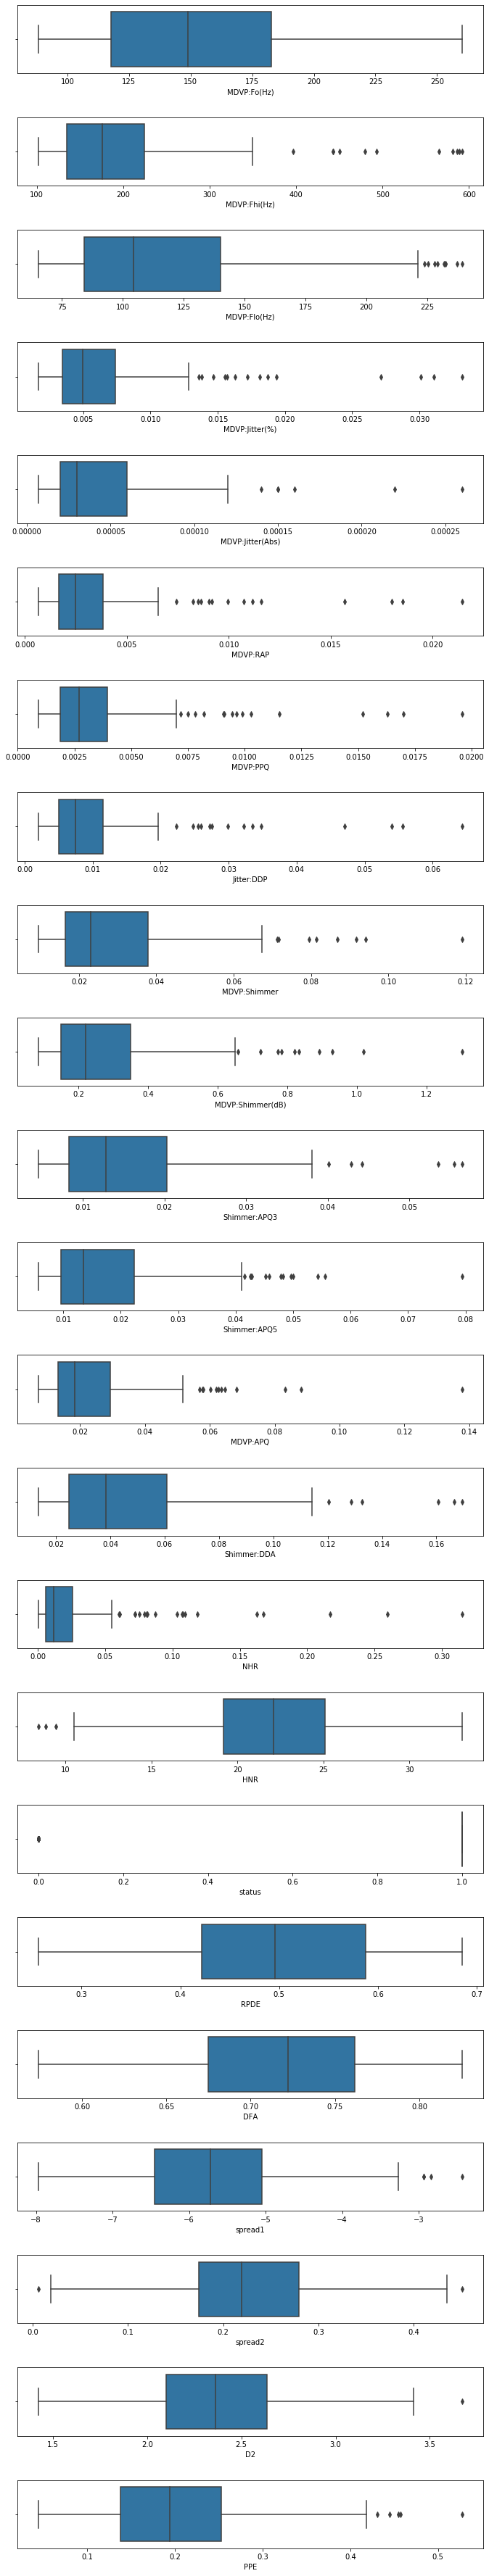

In [15]:
plt.figure(figsize= (10,50)) # To set the plot size.

plt.subplot(23,1,1)        # Here subplot function is used to arrange the plots one-by-one.
sns.boxplot(data1['MDVP:Fo(Hz)']) # This function creates boxplot as shown below to visualize the distribution of a data also gives visualization on the presence of outliers and five point summary.
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(23,1,2)
sns.boxplot(data1['MDVP:Fhi(Hz)'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(23,1,3)
sns.boxplot(data1['MDVP:Flo(Hz)'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(23,1,4)
sns.boxplot(data1['MDVP:Jitter(%)'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(23,1,5)
sns.boxplot(data1['MDVP:Jitter(Abs)'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(23,1,6)       
sns.boxplot(data1['MDVP:RAP']) 
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(23,1,7)
sns.boxplot(data1['MDVP:PPQ'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(23,1,8)
sns.boxplot(data1['Jitter:DDP'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(23,1,9)
sns.boxplot(data1['MDVP:Shimmer'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(23,1,10)
sns.boxplot(data1['MDVP:Shimmer(dB)'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(23,1,11)        
sns.boxplot(data1['Shimmer:APQ3'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(23,1,12)
sns.boxplot(data1['Shimmer:APQ5'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(23,1,13)
sns.boxplot(data1['MDVP:APQ'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(23,1,14)
sns.boxplot(data1['Shimmer:DDA'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(23,1,15)
sns.boxplot(data1['NHR'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(23,1,16)
sns.boxplot(data1['HNR'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(23,1,17)        
sns.boxplot(data1['status']) 
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(23,1,18)
sns.boxplot(data1['RPDE'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(23,1,19)
sns.boxplot(data1['DFA'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(23,1,20)
sns.boxplot(data1['spread1'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(23,1,21)
sns.boxplot(data1['spread2'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(23,1,22)
sns.boxplot(data1['D2'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(23,1,23)
sns.boxplot(data1['PPE'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

##### Infernce on the above output:
Five point summary can be taken from the above displayed table and box plots for all the features.
For eg let us take attribute MDVP:Fo(Hz)	:
 1. min - 88.333000 Hz.
 2. 25% quartiles - 117.5200 Hz.
 3. 50% quartiles(median) - 148.790000 Hz.
 4. 75% quartiles - 182.769000 Hz.
 5. max - 260.105000 Hz. 
   
     similarly it can be done for all the other numerical vriables.
 
    From the above table we can infer central tendancy and measure of dispersion:
 For eg let us take attribute age:
  1. Measure of central tendancy here is medain(50%) - 148.790000 Hz.
  2. Measure of Dispersion:
     
     a. Range: Max-Min = 171.77 Hz.
     
     b. Inter Quartile Range: (75% quartiles) - (25% quartiles) = 65.249 Hz.
     
     c. Std Dev (Average distance/How far the data is distributed from the mean) - 41.390065 Hz.

#### The five point summary was also visualized using the boxplot where the left end and right end of the whiskers represnt the min and max values respectively, the box represent 25%, 50%(median) and 75% quartiles. 


#### e.Measure of skewness:
Skewness is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point.

In [34]:
data1.skew() #To determine the skewness value of all the features.

MDVP:Fo(Hz)         0.591737
MDVP:Fhi(Hz)        2.542146
MDVP:Flo(Hz)        1.217350
MDVP:Jitter(%)      3.084946
MDVP:Jitter(Abs)    2.649071
MDVP:RAP            3.360708
MDVP:PPQ            3.073892
Jitter:DDP          3.362058
MDVP:Shimmer        1.666480
MDVP:Shimmer(dB)    1.999389
Shimmer:APQ3        1.580576
Shimmer:APQ5        1.798697
MDVP:APQ            2.618047
Shimmer:DDA         1.580618
NHR                 4.220709
HNR                -0.514317
status             -1.187727
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
PPE                 0.797491
dtype: float64

##### Inference on the above box plot and Skewness values:
#### Based on the above Box plots and skewness values it can also be interpreted as follows:
1. If the Median line in the box plot is more towards the Q1 and skewness value is >0 then the Data is skewed (i.e. the distribution is not symmetry to the left and right of the center) in the right, if skewness value is greater than one then the data is highly skewed in the right .

2. If the Median line in the box plot is more towards the Q3 and skewness value is <0 then the Data is skewed (i.e. the distribution is not symmetry to the left and right of the center) in the left, if skewnees value is lesser than minus one then the data is highly skewed in the left . 

#### f.Measure of Kurtosis:
 Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers. Data sets with low kurtosis tend to have light tails, or lack of outliers.

In [12]:
data1.kurtosis()

MDVP:Fo(Hz)         -0.627898
MDVP:Fhi(Hz)         7.627241
MDVP:Flo(Hz)         0.654615
MDVP:Jitter(%)      12.030939
MDVP:Jitter(Abs)    10.869043
MDVP:RAP            14.213798
MDVP:PPQ            11.963922
Jitter:DDP          14.224762
MDVP:Shimmer         3.238308
MDVP:Shimmer(dB)     5.128193
Shimmer:APQ3         2.720152
Shimmer:APQ5         3.874210
MDVP:APQ            11.163288
Shimmer:DDA          2.720661
NHR                 21.994974
HNR                  0.616036
status              -0.595518
RPDE                -0.921781
DFA                 -0.686152
spread1             -0.050199
spread2             -0.083023
D2                   0.220334
PPE                  0.528335
dtype: float64

##### Inference on the output:

1. Attribute with kurtosis value with 0 or approximately to 0 is said to have distribution similar to the Normal distribution.
2. Kurtosis with value less than 0 is said to be light tailed.
3. Kurtosis with value more than 0 is said to be right tailed.
4. If kurtosis value is greater than zero then there are heavy tails.
5. If kurtosis value is lesser than zero then there are light tails.

### Univariate Analysis:

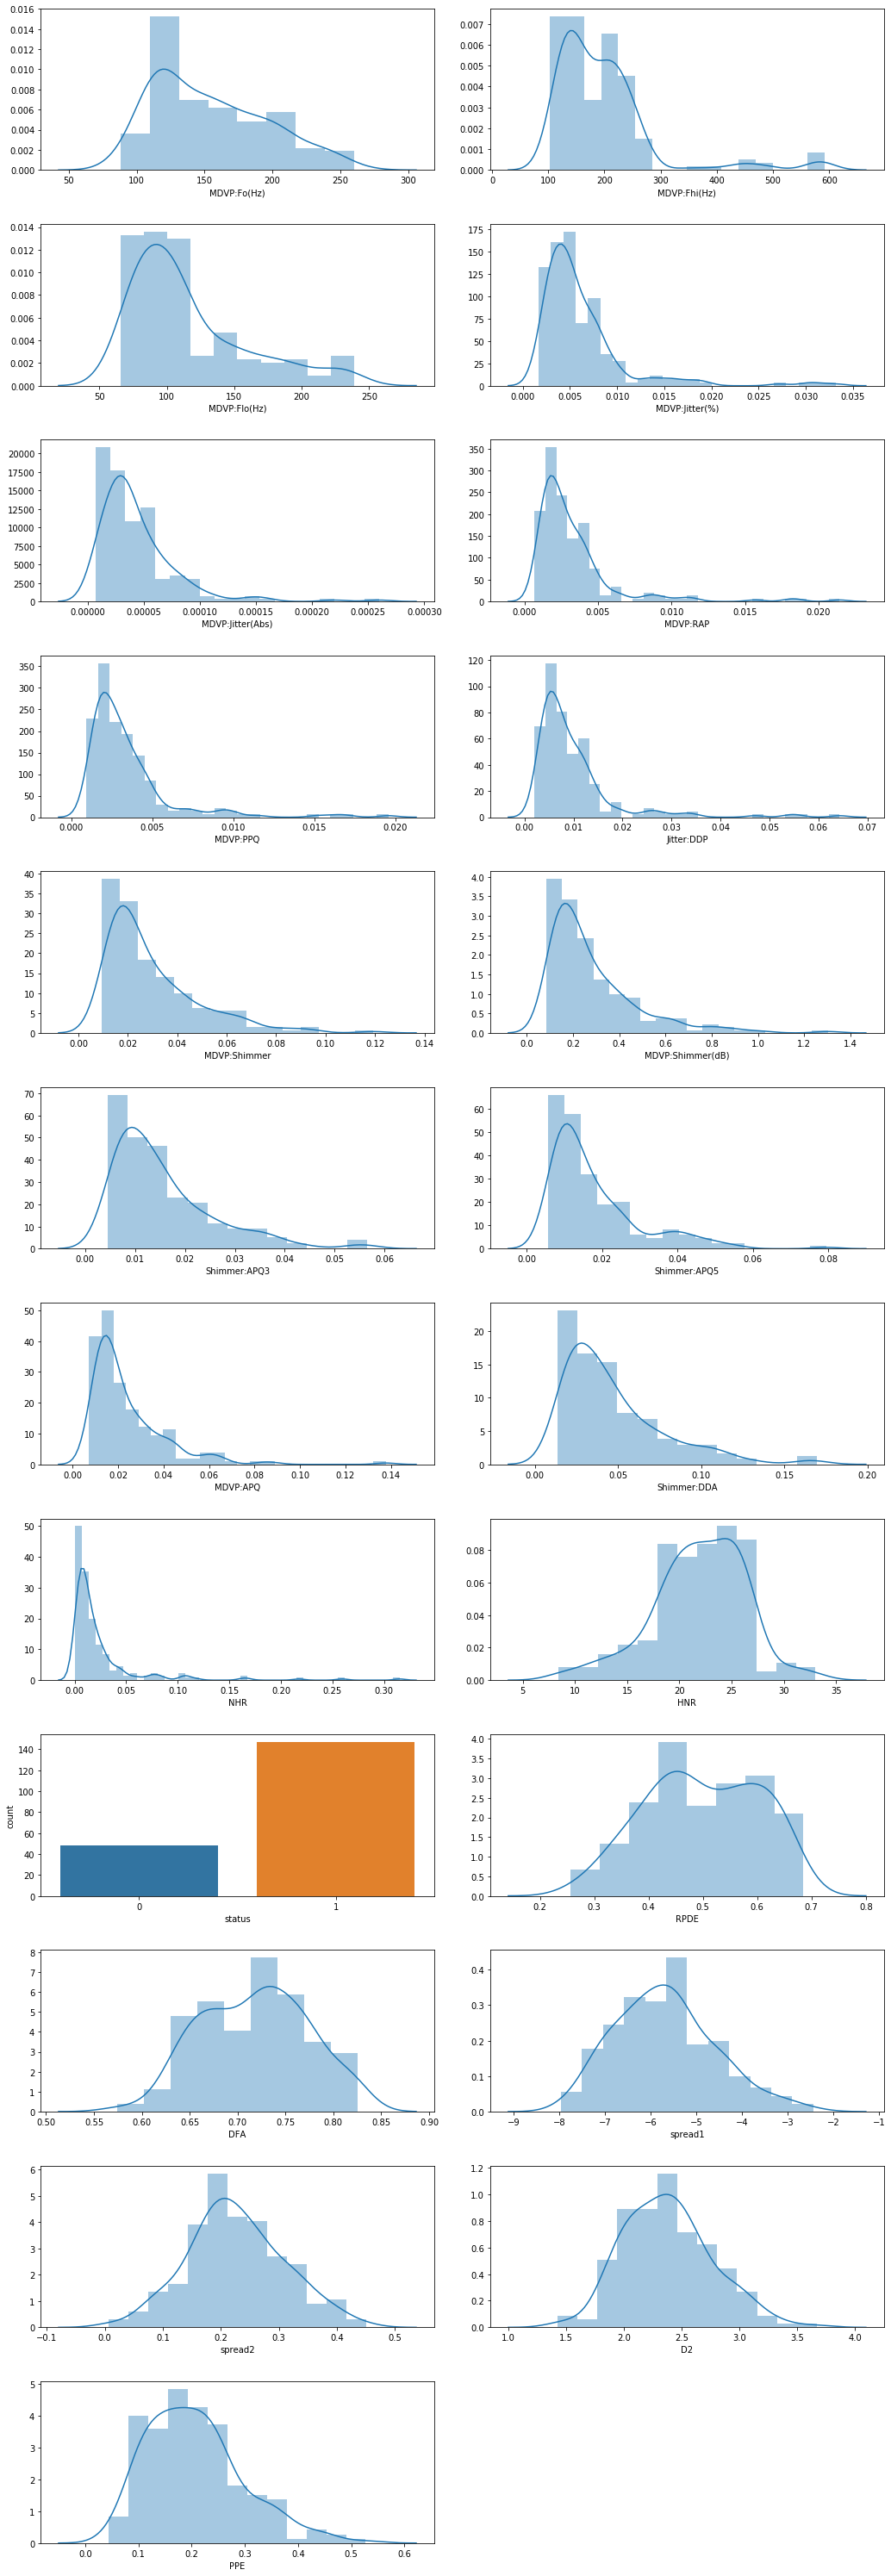

In [11]:
plt.figure(figsize= (15,80)) # To set the plot size.

plt.subplot(23,2,1)        # Here subplot function is used to arrange the plots one-by-one.
sns.distplot(data1['MDVP:Fo(Hz)']) # This function creates boxplot as shown below to visualize the distribution of a data also gives visualization on the presence of outliers and five point summary.
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(23,2,2)
sns.distplot(data1['MDVP:Fhi(Hz)'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(23,2,3)
sns.distplot(data1['MDVP:Flo(Hz)'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(23,2,4)
sns.distplot(data1['MDVP:Jitter(%)'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(23,2,5)
sns.distplot(data1['MDVP:Jitter(Abs)'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(23,2,6)       
sns.distplot(data1['MDVP:RAP']) 
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(23,2,7)
sns.distplot(data1['MDVP:PPQ'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(23,2,8)
sns.distplot(data1['Jitter:DDP'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(23,2,9)
sns.distplot(data1['MDVP:Shimmer'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(23,2,10)
sns.distplot(data1['MDVP:Shimmer(dB)'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(23,2,11)        
sns.distplot(data1['Shimmer:APQ3'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(23,2,12)
sns.distplot(data1['Shimmer:APQ5'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(23,2,13)
sns.distplot(data1['MDVP:APQ'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(23,2,14)
sns.distplot(data1['Shimmer:DDA'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(23,2,15)
sns.distplot(data1['NHR'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(23,2,16)
sns.distplot(data1['HNR'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(23,2,17)        
sns.countplot(data1['status']) 
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(23,2,18)
sns.distplot(data1['RPDE'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(23,2,19)
sns.distplot(data1['DFA'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(23,2,20)
sns.distplot(data1['spread1'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(23,2,21)
sns.distplot(data1['spread2'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(23,2,22)
sns.distplot(data1['D2'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(23,2,23)
sns.distplot(data1['PPE'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

#### Inference of the plots in the univariate analysis:

##### 1. Inference on the MDVP:Fo(Hz) plot:
1. This attribute seems to be Right tailed.
2. There is only one peak with single mode.
3. Most of the Average vocal fundamental frequency is between 100 Hz to 250 Hz.
4. The distribution is fairly symmetrical with right tail (skewness value of 0.59).
5. This also shows that attribute is lightly tailed (kurtosis value: -0.63)leading to blunt peak.

##### 2. Inference on the MDVP:Fhi(Hz) plot:
1. This attribute seems to be Right tailed.
2. The data consist of more values of Maximum vocal fundamental frequency between 100Hz to 300Hz.
3. There are also few entries of Maximum vocal fundamental frequency between 400Hz and 600Hz.
4. The KDE of this plot shows that the data is unimodal.
5. The data is highly unsymmetry with right tailed (with the skewness value of 2.54).
6. The data is also very heavily right tailed with sharp peak indicating more concentration of data in that peak value and data is less ditributed across other values. (kurtosis value >1 (7.62)).

##### 3. Inference on the MDVP:Flo(Hz) plot:
1. The data is unimodal.
2. The data is highly unsymmetrical with right skewed (skewness value - 1.21)
3. The distribution is right heavily tailed with moderate peak indicating moderate concentration of data in that peak value and data is moderately ditributed across other values .(kurtosis value - 0.65).

##### 4.Inference on the MDVP:Jitter(%) plot:
1. The data is unimodal.
2. The data is highly unsymmetrical with right skewed (skewness value - 3.084946)
3. The distribution is right heavily tailed with sharp peak indicating more concentration of data in that peak value and data is less ditributed across other values .(kurtosis value - 12.030939).

##### 5.Inference on the MDVP:Jitter(Abs) plot:
1. The data is unimodal.
2. The data is highly unsymmetrical with right skewed (skewness value - 2.649071)
3. The distribution is right heavily tailed with sharp peak indicating high concentration of data in that peak value and data is less ditributed across other values .(kurtosis value - 10.869043).

##### 6. Inference on the MDVP:RAP plot:
1. The data is unimodal.
2. The data is highly unsymmetrical with right skewed (skewness value - 3.360708)
3. The distribution is right heavily tailed with very sharp peak indicating high concentration of data in that peak value and data is less ditributed across other values .(kurtosis value - 14.213798).

##### 7. Inference on the  MDVP:PPQ plot:
1. The data is unimodal.
2. The data is highly unsymmetrical with right skewed (skewness value - 3.073892)
3. The distribution is right heavily tailed with very sharp peak indicating high concentration of data in that peak value and data is less ditributed across other values .(kurtosis value - 11.963922).

##### 8. Inference on the Jitter:DDP plot:
1. The data is unimodal.
2. The data is highly unsymmetrical with right skewed (skewness value - 3.362058)
3. The distribution is right heavily tailed with very sharp peak indicating high concentration of data in that peak value and data is less ditributed across other values .(kurtosis value - 14.224762).

##### 9. Inference on the MDVP:Shimmer plot:
1. The data is unimodal.
2. The data is highly unsymmetrical with right skewed (skewness value - 1.666480)
3. The distribution is right heavily tailed with moderate peak indicating moderate concentration of data in that peak value and data is moderately ditributed across other values .(kurtosis value -  3.238308).

##### 10. Inference on the MDVP:Shimmer(dB) plot:
1. The data is unimodal.
2. The data is highly unsymmetrical with right skewed (skewness value - 1.999389)
3. The distribution is right heavily tailed with moderate peak indicating moderate concentration of data in that peak value and data is moderately ditributed across other values .(kurtosis value - 5.128193).

##### 11. Inference on the Shimmer:APQ3 plot:
1. The data is unimodal.
2. The data is highly unsymmetrical with right skewed (skewness value -  1.580576)
3. The distribution is right heavily tailed with blunt peak indicating moderate concentration of data in that peak value and data is largely ditributed across other values .(kurtosis value - 2.720152).

##### 12. Inference on the Shimmer:APQ5 plot:
1. The data is unimodal.
2. The data is highly unsymmetrical with right skewed (skewness value - 1.798697)
3. The distribution is right heavily tailed with sharp peak indicating moderate concentration of data in that peak value and data is moderately ditributed across other values .(kurtosis value - 3.874210).

##### 13. Inference on the MDVP:APQ plot:
1. The data is unimodal.
2. The data is highly unsymmetrical with right skewed (skewness value - 2.618047)
3. The distribution is right heavily tailed with sharp peak indicating more concentration of data in that peak value and data is less ditributed across other values .(kurtosis value - 11.163288).

##### 14. Inference on the Shimmer:DDA plot:
1. The data is unimodal.
2. The data is highly unsymmetrical with right skewed (skewness value - 1.580618)
3. The distribution is right heavily tailed with slightly blunt peak indicating moderate concentration of data in that peak value and data is moderately ditributed across other values .(kurtosis value - 2.720661).

##### 15. Inference on the NHR plot:
1. The data is unimodal.
2. The data is highly unsymmetrical with right skewed (skewness value - 4.220709)
3. The distribution is right very heavily tailed with very sharp peak indicating very high concentration of data in that peak value and data is very less ditributed across other values .(kurtosis value - 21.994974).

##### 16. Inference on the HNR plot:
1. The data is unimodal.
2. The data is highly unsymmetrical with right skewed (skewness value - -0.514317)
3. The distribution is right heavily tailed with moderate peak indicating moderate concentration of data in that peak value and data is moderately ditributed across other values .(kurtosis value - 0.616036).

##### 17. Inference on the status plot:
1. No.of records with respect to class label 1 is 147.
2. No.of records with respect to class label 0 is 48.
3. Percentage difference between class labels 67.35%.

##### 18. Inference on the RPDE plot:
1. The data is unimodal.
2. The data is lightly unsymmetrical with left skewed (skewness value - -0.143402 )
3. The distribution is left lightly tailed with blunt peak indicating data is ditributed across other values .(kurtosis value - -0.921781).

##### 19. Inference on the DFA plot:
1. The data is unimodal.
2. The data is lightly unsymmetrical with left skewed (skewness value - -0.033214)
3. The distribution is left lightly tailed with blunt peak indicating data is ditributed across other values .(kurtosis value - -0.686152).

##### 20. Inference on the spread1 plot:
1. The data is unimodal.
2. The data is fairly unsymmetrical with right skewed (skewness value - 0.432139)
3. The distribution is not much tailed with moderate peak indicating moderate concentration of data in that peak value and data is moderately ditributed across other values .(kurtosis value - -0.050199).

##### 21. Inference on the spread2 plot:
1. The data is unimodal.
2. The data is very lightly unsymmetrical with right skewed (skewness value - 0.144430)
3. The distribution is right lightly tailed with moderate peak indicating moderate concentration of data in that peak value and data is moderately ditributed across other values .(kurtosis value - -0.083023).

##### 22. Inference on the D2 plot:
1. The data is unimodal.
2. The data is lightly unsymmetrical with right skewed (skewness value - 0.430384)
3. The distribution is right tailed with moderate peak indicating moderate concentration of data in that peak value and data is moderately ditributed across other values .(kurtosis value - 0.220334).

##### 23. Inference on the PPE plot:
1. The data is unimodal.
2. The data is unsymmetrical with right skewed (skewness value - 0.797491)
3. The distribution is right heavily tailed with flattened peak indicating moderate concentration of data in that flatteneed peak value and data is moderately ditributed across other values .(kurtosis value - 0.528335).


### Bivariate Analysis:

In this let us see visually how the target variable is influenced by the other attributes. 

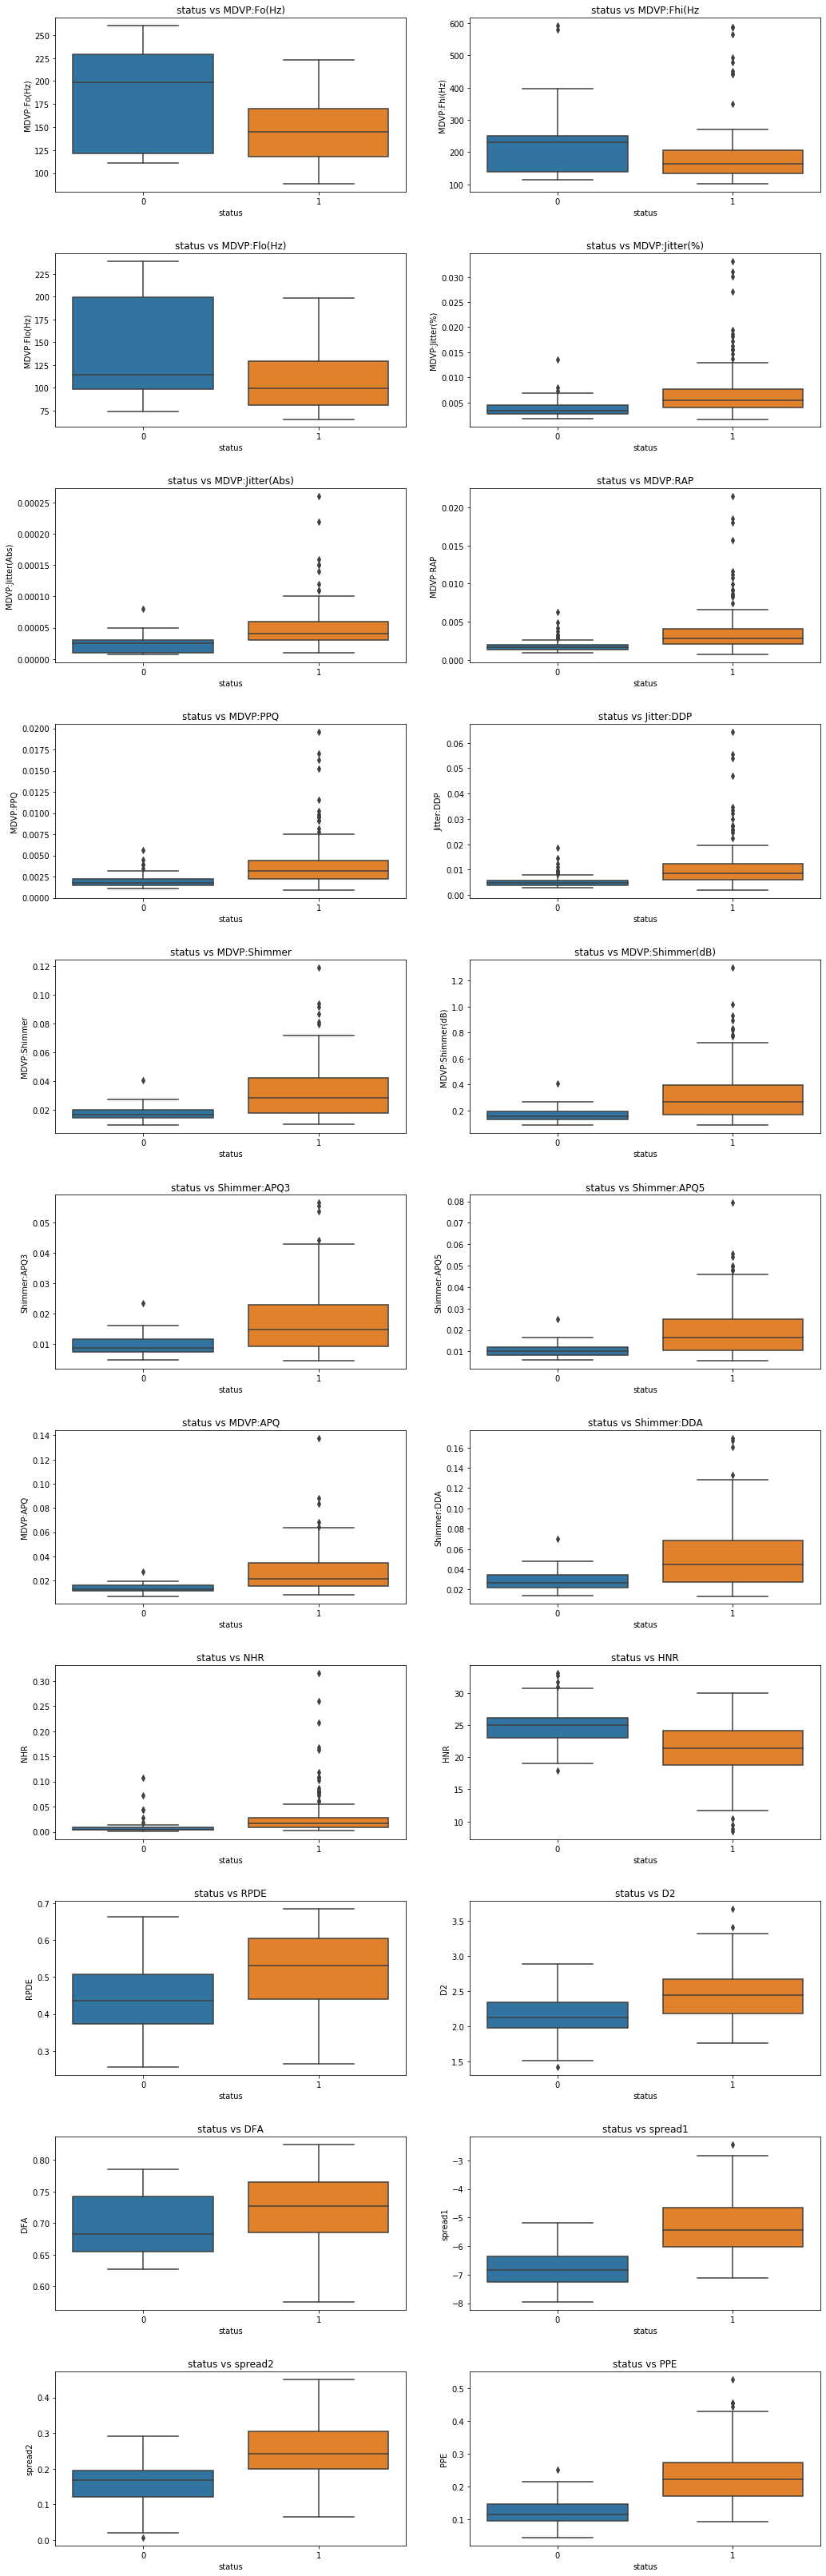

In [6]:
plt.figure(figsize= (15,90)) # To set the plot size.

plt.subplot(22,2,1)       # Here subplot function is used to arrange the plots one-by-one and two plots in one row.
sns.boxplot(data1['status'],data1['MDVP:Fo(Hz)']) # This function creates boxplot as shown below to visualize the distribution of a data also gives visualization on the presence of outliers and five point summary.
plt.title('status vs MDVP:Fo(Hz)') #To plot the graph with the title of the page.
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(22,2,2)
sns.boxplot(data1['status'],data1['MDVP:Fhi(Hz)']) # This function creates boxplot as shown below to visualize the distribution of a data also gives visualization on the presence of outliers and five point summary.
plt.title('status vs MDVP:Fhi(Hz') #To plot the graph with the title of the page.
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(22,2,3)
sns.boxplot(data1['status'],data1['MDVP:Flo(Hz)']) # This function creates boxplot as shown below to visualize the distribution of a data also gives visualization on the presence of outliers and five point summary.
plt.title('status vs MDVP:Flo(Hz)') #To plot the graph with the title of the page.
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(22,2,4)
sns.boxplot(data1['status'],data1['MDVP:Jitter(%)']) # This function creates boxplot as shown below to visualize the distribution of a data also gives visualization on the presence of outliers and five point summary.
plt.title('status vs MDVP:Jitter(%)') #To plot the graph with the title of the page.
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(22,2,5)
sns.boxplot(data1['status'],data1['MDVP:Jitter(Abs)']) # This function creates boxplot as shown below to visualize the distribution of a data also gives visualization on the presence of outliers and five point summary.
plt.title('status vs MDVP:Jitter(Abs)') #To plot the graph with the title of the page.
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(22,2,6)       
sns.boxplot(data1['status'],data1['MDVP:RAP']) # This function creates boxplot as shown below to visualize the distribution of a data also gives visualization on the presence of outliers and five point summary.
plt.title('status vs MDVP:RAP') #To plot the graph with the title of the page.
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(22,2,7)
sns.boxplot(data1['status'],data1['MDVP:PPQ']) # This function creates boxplot as shown below to visualize the distribution of a data also gives visualization on the presence of outliers and five point summary.
plt.title('status vs MDVP:PPQ') #To plot the graph with the title of the page.
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(22,2,8)
sns.boxplot(data1['status'],data1['Jitter:DDP']) # This function creates boxplot as shown below to visualize the distribution of a data also gives visualization on the presence of outliers and five point summary.
plt.title('status vs Jitter:DDP') #To plot the graph with the title of the page.
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(22,2,9)
sns.boxplot(data1['status'],data1['MDVP:Shimmer']) # This function creates boxplot as shown below to visualize the distribution of a data also gives visualization on the presence of outliers and five point summary.
plt.title('status vs MDVP:Shimmer') #To plot the graph with the title of the page.
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(22,2,10)
sns.boxplot(data1['status'],data1['MDVP:Shimmer(dB)']) # This function creates boxplot as shown below to visualize the distribution of a data also gives visualization on the presence of outliers and five point summary.
plt.title('status vs MDVP:Shimmer(dB)') #To plot the graph with the title of the page.
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(22,2,11)        
sns.boxplot(data1['status'],data1['Shimmer:APQ3']) # This function creates boxplot as shown below to visualize the distribution of a data also gives visualization on the presence of outliers and five point summary.
plt.title('status vs Shimmer:APQ3') #To plot the graph with the title of the page.
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(22,2,12)
sns.boxplot(data1['status'],data1['Shimmer:APQ5']) # This function creates boxplot as shown below to visualize the distribution of a data also gives visualization on the presence of outliers and five point summary.
plt.title('status vs Shimmer:APQ5') #To plot the graph with the title of the page.
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(22,2,13)
sns.boxplot(data1['status'],data1['MDVP:APQ']) # This function creates boxplot as shown below to visualize the distribution of a data also gives visualization on the presence of outliers and five point summary.
plt.title('status vs MDVP:APQ') #To plot the graph with the title of the page.
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(22,2,14)
sns.boxplot(data1['status'],data1['Shimmer:DDA']) # This function creates boxplot as shown below to visualize the distribution of a data also gives visualization on the presence of outliers and five point summary.
plt.title('status vs Shimmer:DDA') #To plot the graph with the title of the page.
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(22,2,15)
sns.boxplot(data1['status'],data1['NHR']) # This function creates boxplot as shown below to visualize the distribution of a data also gives visualization on the presence of outliers and five point summary.
plt.title('status vs NHR') #To plot the graph with the title of the page.
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(22,2,16)
sns.boxplot(data1['status'],data1['HNR']) # This function creates boxplot as shown below to visualize the distribution of a data also gives visualization on the presence of outliers and five point summary.
plt.title('status vs HNR') #To plot the graph with the title of the page.
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(22,2,17)        
sns.boxplot(data1['status'],data1['RPDE']) # This function creates boxplot as shown below to visualize the distribution of a data also gives visualization on the presence of outliers and five point summary.
plt.title('status vs RPDE') #To plot the graph with the title of the page.
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(22,2,18)
sns.boxplot(data1['status'],data1['D2']) # This function creates boxplot as shown below to visualize the distribution of a data also gives visualization on the presence of outliers and five point summary.
plt.title('status vs D2') #To plot the graph with the title of the page.
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(22,2,19)
sns.boxplot(data1['status'],data1['DFA']) # This function creates boxplot as shown below to visualize the distribution of a data also gives visualization on the presence of outliers and five point summary.
plt.title('status vs DFA') #To plot the graph with the title of the page.
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(22,2,20)
sns.boxplot(data1['status'],data1['spread1']) # This function creates boxplot as shown below to visualize the distribution of a data also gives visualization on the presence of outliers and five point summary.
plt.title('status vs spread1') #To plot the graph with the title of the page.
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(22,2,21)
sns.boxplot(data1['status'],data1['spread2']) # This function creates boxplot as shown below to visualize the distribution of a data also gives visualization on the presence of outliers and five point summary.
plt.title('status vs spread2') #To plot the graph with the title of the page.
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(22,2,22)
sns.boxplot(data1['status'],data1['PPE']) # This function creates boxplot as shown below to visualize the distribution of a data also gives visualization on the presence of outliers and five point summary.
plt.title('status vs PPE') #To plot the graph with the title of the page.
plt.tight_layout(pad=3.0) #To leave space between the plots. 


##### 1. Inference on the status vs MDVP:Fo(Hz) plot:
     It can be noticed that the people affected by Parkinson's have "Average vocal fundamental frequency" low but there are few healthy even in the range were few are affected.

##### 2. Inference on the status vs  MDVP:Fhi(Hz) plot:
     The plot shows that people who are affected have "Maximum vocal fundamental frequency"  at low ranges there are also people who are not affected in that range, even the scenario of outliers  there are affected people so if we remove the outliers for modeling we may not get a model that can be used for predicting or classifying. 

##### 3. Inference on the status vs  MDVP:Flo(Hz) plot:
     People with low "Minimum vocal fundamental frequency" seems to have parkinsons but simultaneouslt in the same range there are also people who are healthy. People with high range of "Minimum vocal fundamental frequency" are healthy.

##### 4.Inference on the status vs  MDVP:Jitter(%) plot:
     This measure of variation in fundamental frequency indicated affected people's frequency in jitter percentage are widely spread less than 0.015% and beyond that also there are affected people which is indicated by outliers. Healthy people have less value but in the same range there are also affected people. 

##### Inference on the status vs  MDVP:Jitter(Abs) plot:
     This measure of variation in fundamental frequency indicated affected people's frequency in jitter abs are widely spread less than 0.00015 and beyond that also there are affected people which is indicated by outliers. Healthy people have less value but in the same range there are also affected people. 

##### Inference on the status vs  MDVP:RAP plot:
    This measure of variation in fundamental frequency indicated affected people's frequency in RAP are widely spread less than 0.010 and beyond that also there are affected people which is indicated by outliers. Healthy people have less value but in the same range there are also affected people. 

##### Inference on the status vs   MDVP:PPQ:
    This measure of variation in fundamental frequency indicated affected people's frequency in PPQ are widely spread less than 0.0075 and beyond that also there are affected people which is indicated by outliers. Healthy people have less value but in the same range there are also affected people. 

##### Inference on the status vs  Jitter:DDP:
    This measure of variation in fundamental frequency indicated affected people's frequency in DDP are widely spread less than 0.02 and beyond that also there are affected people which is indicated by outliers. Healthy people have less value but in the same range there are also affected people. 

##### Inference on the status vs  MDVP:Shimmer plot, tatus vs  MDVP:Shimmer(dB) plot, status vs  Shimmer:APQ3 plot, status vs  Shimmer:APQ5 plot, status vs  MDVP:APQ plot, status vs  Shimmer:DDA plot:
    These measures of variation in amplitude seem to be have similar plots indicating that affected people's frequency are widely spread in the smaller ranges healthy people have less value but in the same range there are also affected people,  beyond that also there are affected people which is indicated by outliers. 

##### Inference on the status vs  NHR plot:
    This measures of ratio of noise to tonal components in the voice indicates that people affected are with values less than 0.10 and there are many outliers indicating they are also affected. Healthy people have very low measures of ratio of noise to tonal components in the voice.

##### Inference on the status vs  HNR plot:
    Plot for this measures of ratio of noise to tonal components in the voice indicated that the range of people affected lie across the vlaue of HNR but healthy people are in the higher values of HNR. 

##### Inference on the status vs  RPDE plot:
    This measure of nonlinear dynamical complexity measure ploted against status indicates that both affected and unaffected people are across the values of RPDE so we cant descriminate the values of RPDE and have a clear classification of reange of RPDE value for affeected people and unaffected people seperately. 

##### Inference on the status vs  D2 plot:
    The plot for this measure of nonlinear dynamical complexity measures shows that people with parkinson's disease have higher range of D2 values but healthy people have lower range of values.The higher range of healthy people's D2 value is in overlap of lower range of affected people's value. 

##### Inference on the status vs  DFA plot:
    The plot of Signal fractal scaling exponent shows that the affected people are over the range of the DFA's value but most of them have the range 0.65 to 0.75. The healthy people are only in the middele range od DFA value.

##### Inference on the Three nonlinear measures of fundamental frequency variation (spread1, spread2 and PPE) vs status  plot:
    These plots show that there are no distiction in their range for the affected and healthy people, there is overlap in the range between the affected and healthy people. There are also outliers in the both cases so a clear decision cant be taken or clear jusrification of effectiveness of these features on the status can not be said.  

### Multivariate Analysis

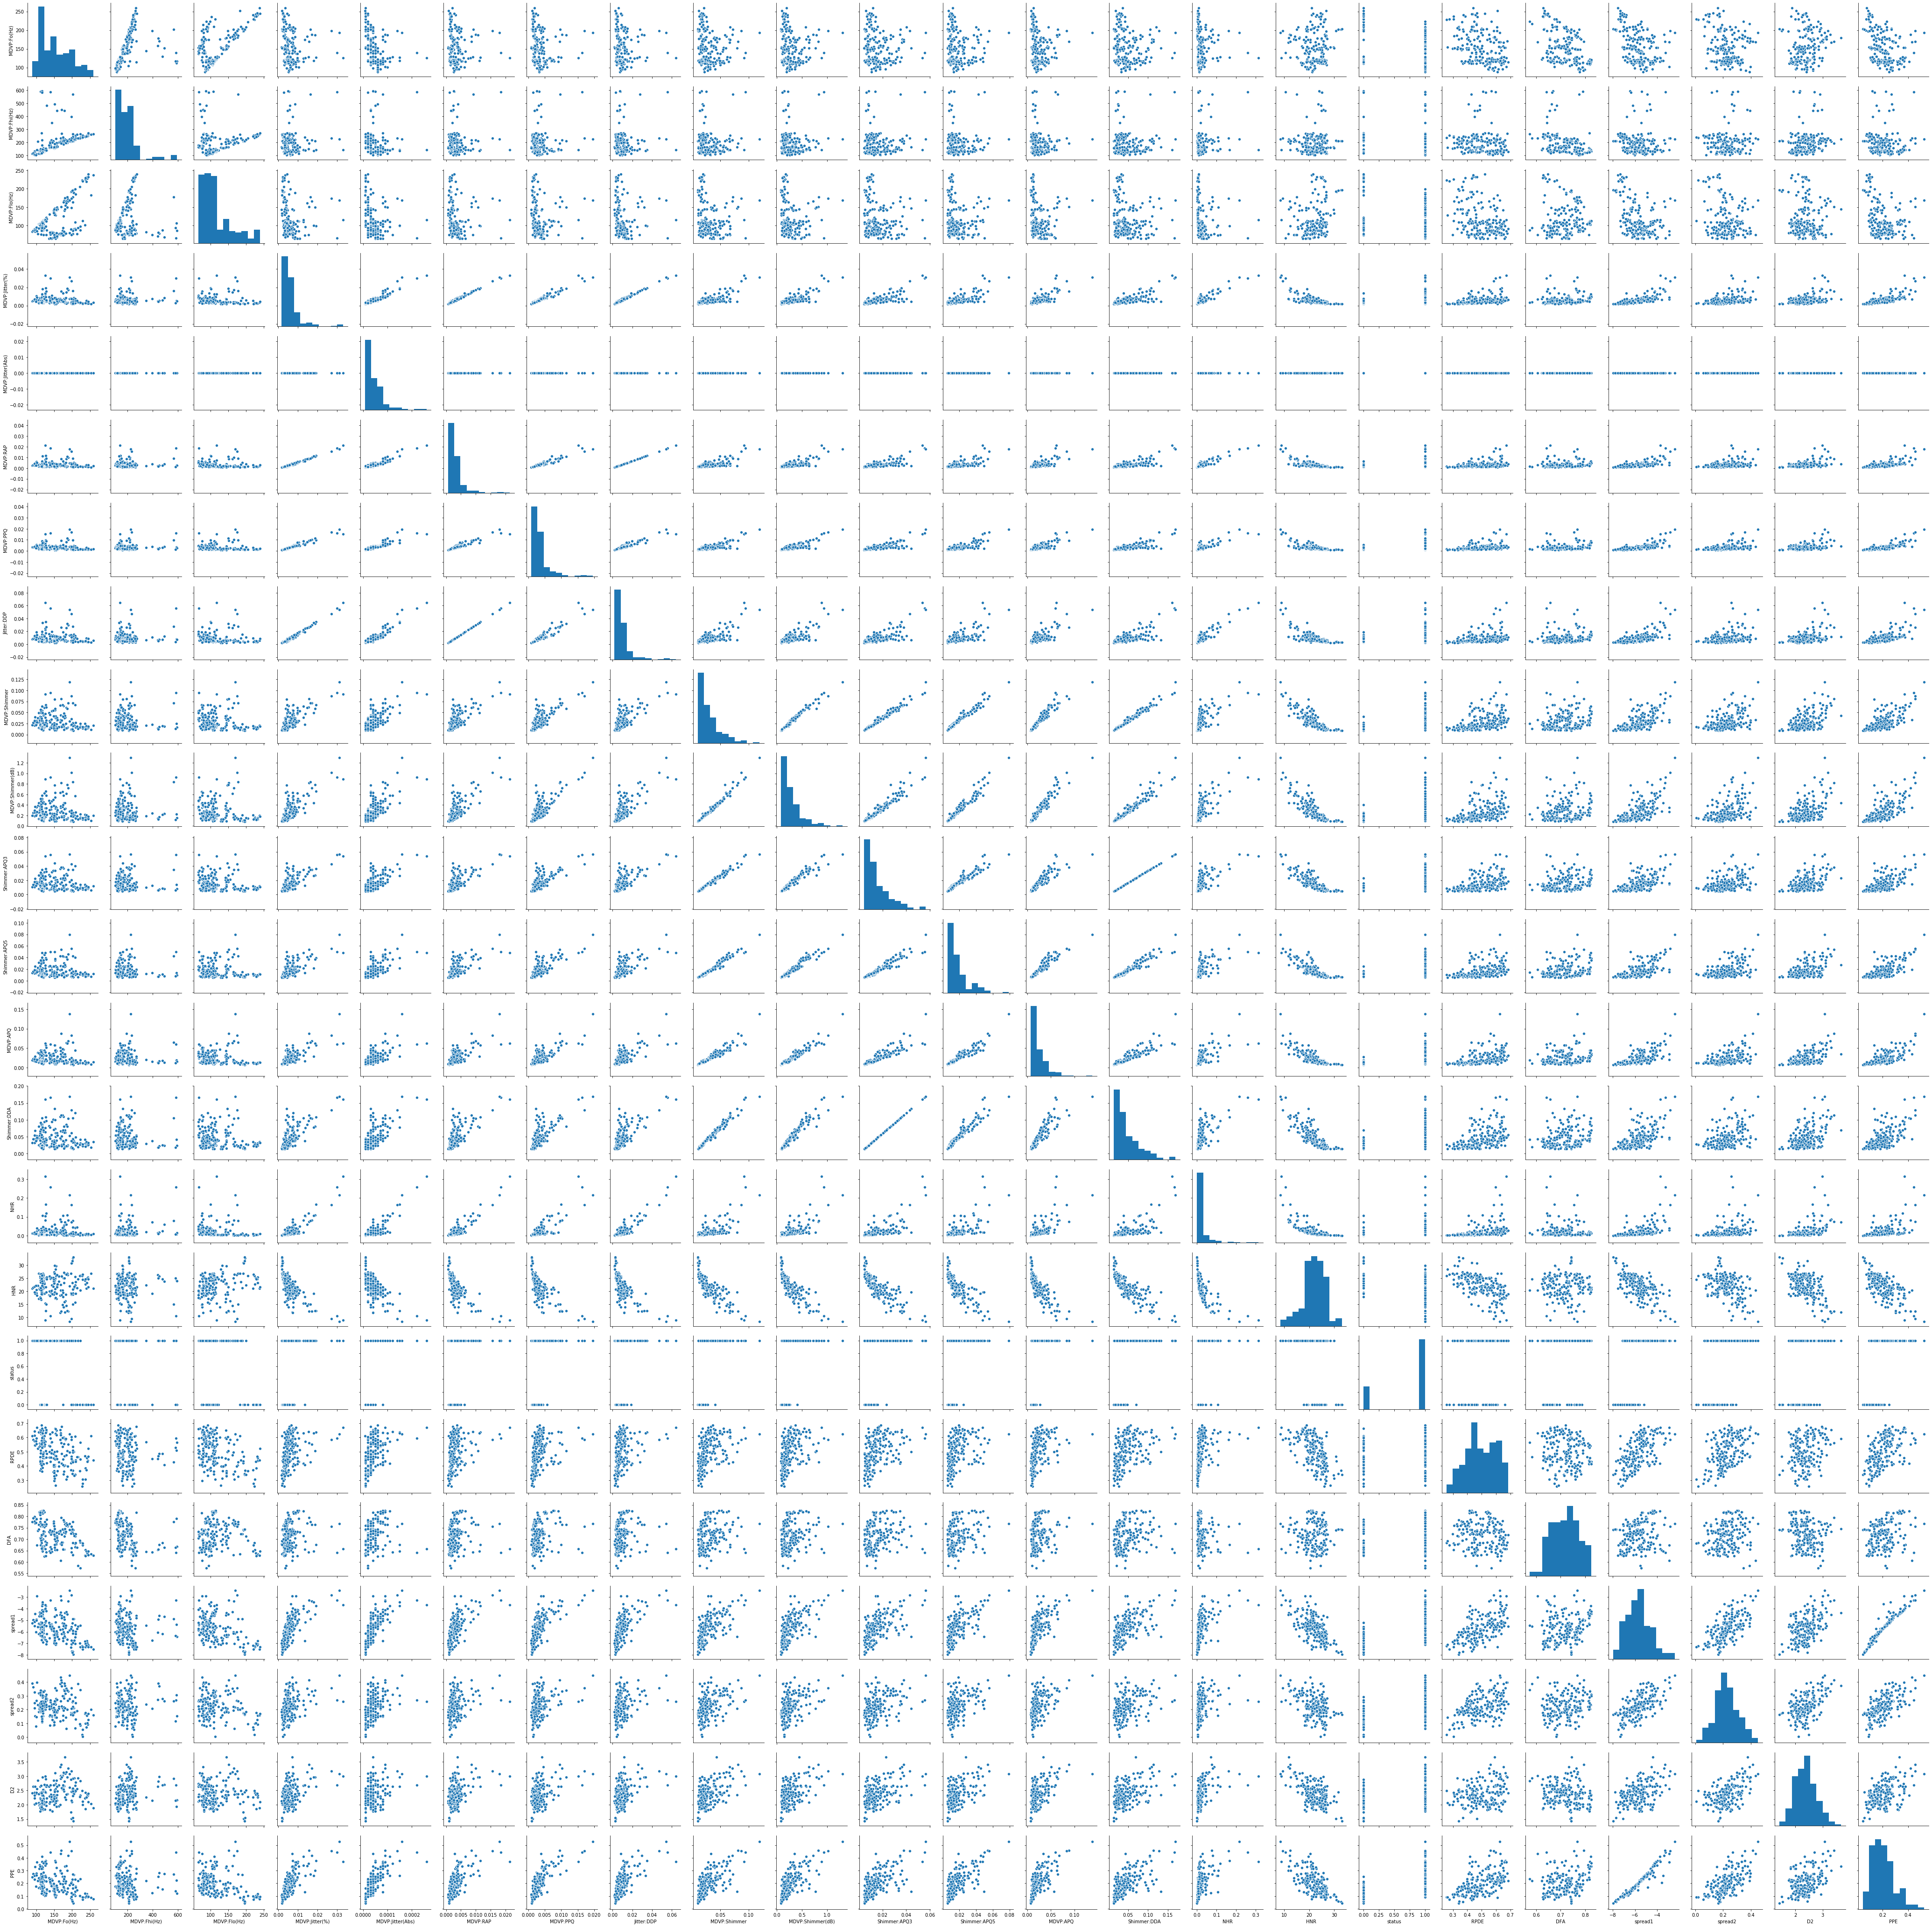

In [7]:
sns.pairplot(data1) #Paitplot for all the columns is displayed using pairplot function from seaborn package. 

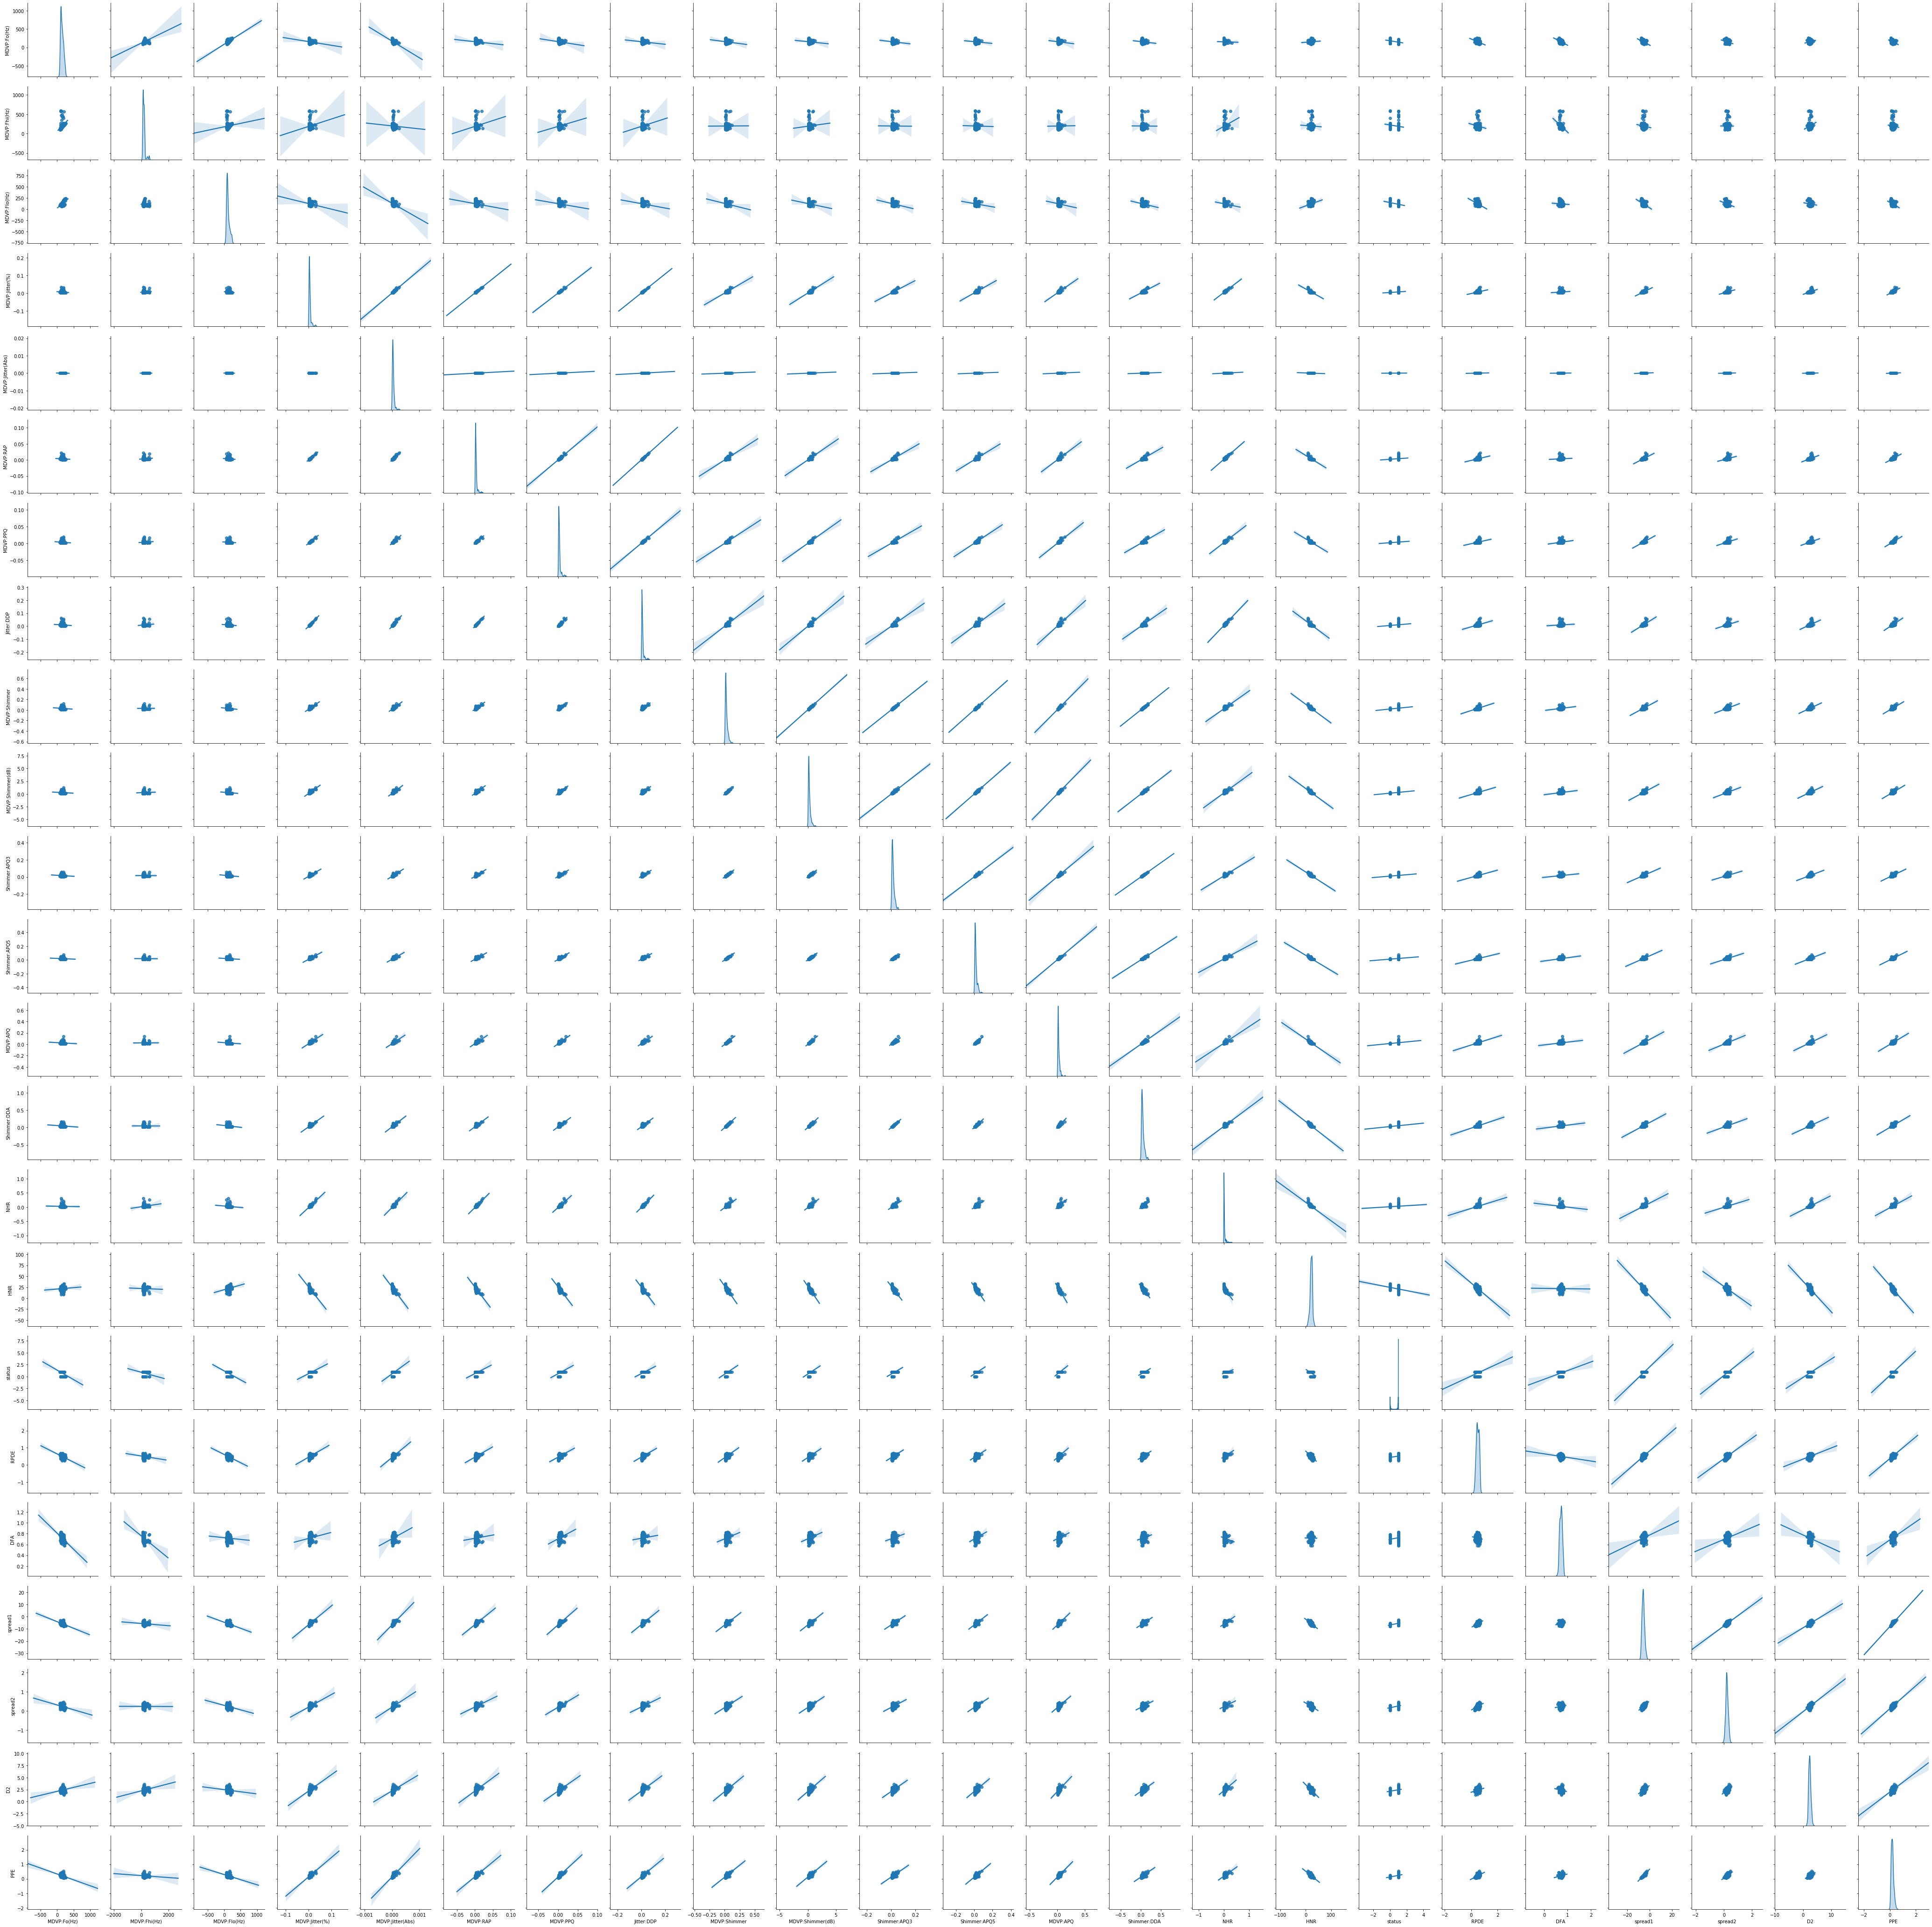

In [10]:
sns.pairplot(data1, kind='reg',diag_kind = 'kde')  #Paitplot for all the columns is displayed using pairplot function from seaborn package.

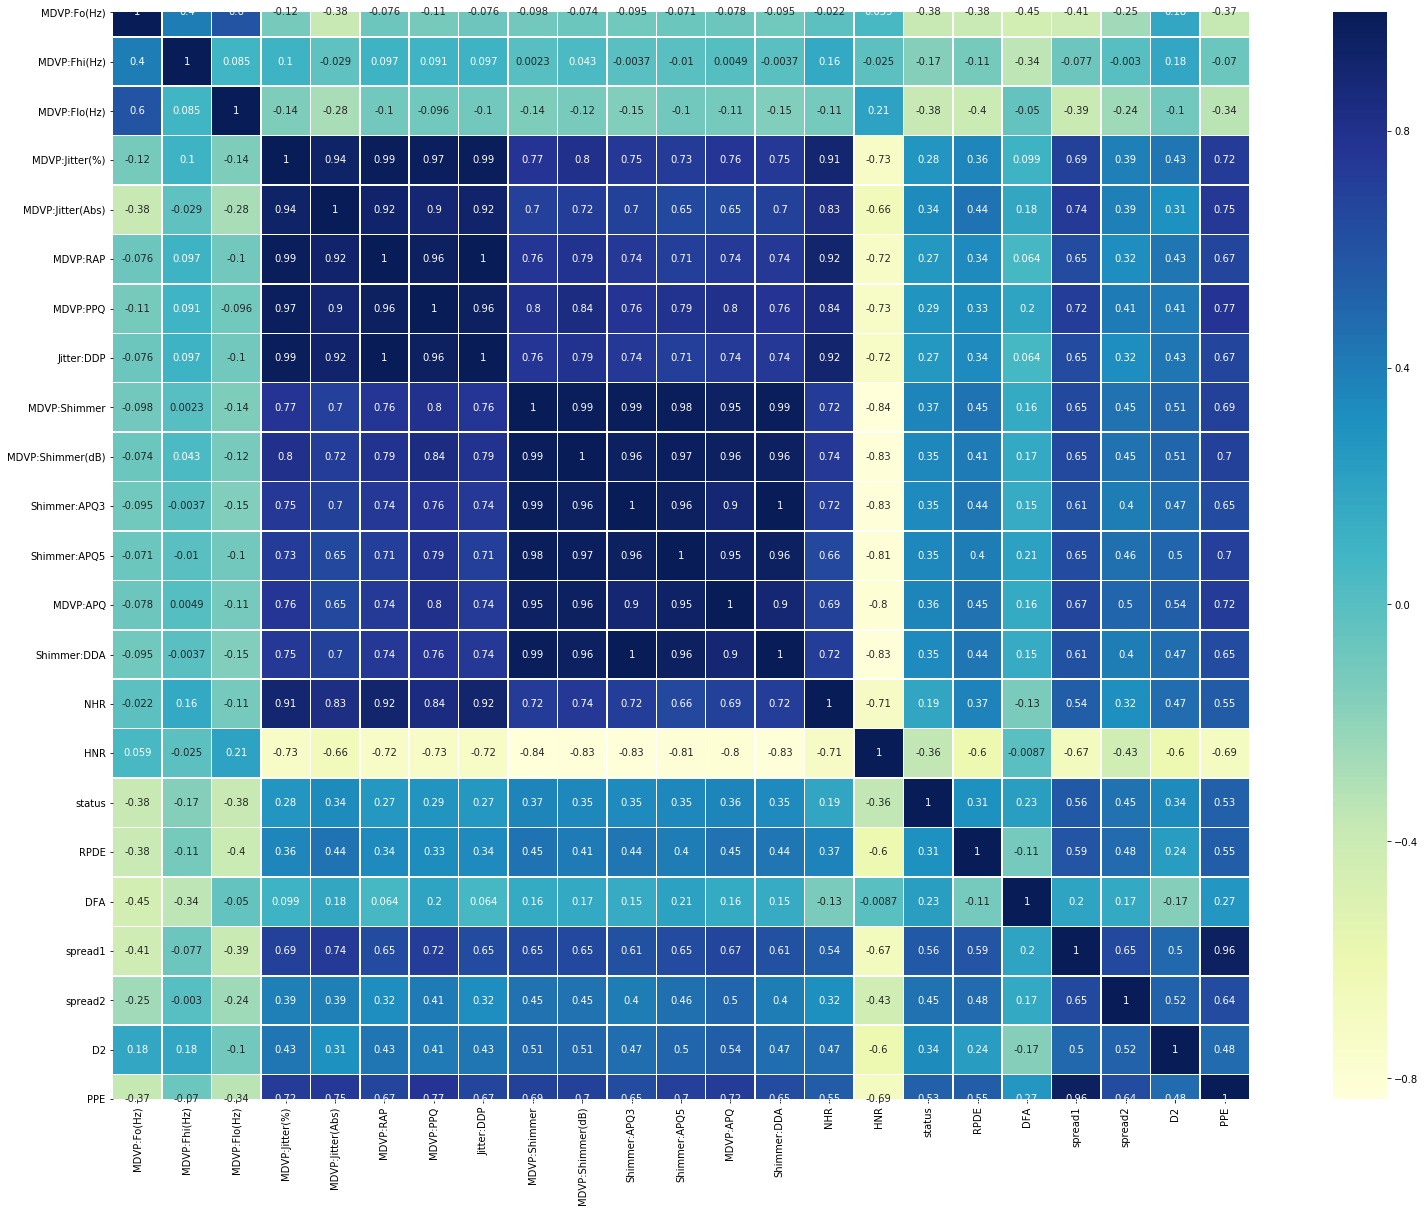

In [22]:
corr=data1.corr() #This function gives the correlation between the features.
plt.subplots(figsize =(30, 20))# Here subplot function is used to give the shape of the each box in the heatmap.
sns.heatmap(corr, linewidths=.5, square=True,cmap="YlGnBu",annot=True) #Using this function we can have the visualization of the correlation between the features.

##### Infernce on the above output:

1. MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency found to be in very high correlatio with each other which will also contribute to multicollinearity but dropping of variables are not done in the model building process without domain knowledge believing that our classification algorithms wont get affected due to the collinearity.

2. MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude found to be in very high correlatio with each other which will also contribute to multicollinearity but dropping of variables are not done in the model building process without domain knowledge believing that our classification algorithms wont get affected due to the collinearity.

3. Several measures of variation in fundamental frequency and Several measures of variation in amplitude are in moderate correlation with each other.

4. Spread 1 is in moderate correlation with Several measures of variation in fundamental frequency, Several measures of variation in amplitude, spread 2, RPDE, D2, PPE.

5. NHR(ratio of noise to tonal components in the voice) is in high correlation with Several measures of variation in fundamental frequency and Several measures of variation in amplitude.

6. PPE(Three nonlinear measures of fundamental frequency variation) is in moderate correlation with Several measures of variation in fundamental frequency and Several measures of variation.

===================================================================================================================

# 4. Split the dataset into training and test set in the ratio of 70:30 (Training:Test) (5 points) and 5. Prepare the data for training - Scale the data if necessary, get rid of missing values (if any) etc (5 points)

# Data Preprocessing:

 Data Preprocessing involves:
 1. Data Imputation (Step:1).
 2. Outlier Detection and Cleaning Process (Step:2).

#### Step 1: Checking for the presence of null values:

In [67]:
data1.isna().values.any() #Detects missing values and if any missing value is present it gives the output as True or else False.

False

##### Inference on the above ouput:
1. There are no missing values in the data. It is important to remove missing values and data entry with zero because our eager learner Naive Baye's will get affected as they are based on probablities.
2. Here all fields are filled with values there are no missing values. Therefore it is not necessary to use function like df.dropna() to clean the Nan/Null data or df.fillna() to fill the missing values.

#### Step 2: Outlier Detection and Elemination:
  Outliers can be detected in the following methods:
  
  1. Visualization Techniques:
       
       a. Box Plot.
       
       b. Scatter Plot.
       
       
  2. Non - Visualization Techniques:
      
      a. Z-score
      
      b. IQR.

Outlier elemination methods:
 
  1. Z-Score.
  2. IQR

#### a.: Outlier Detection:
    In our data the outliers are detected for features of continuous and few categorical variables like Age, Experience, family and Education data type.

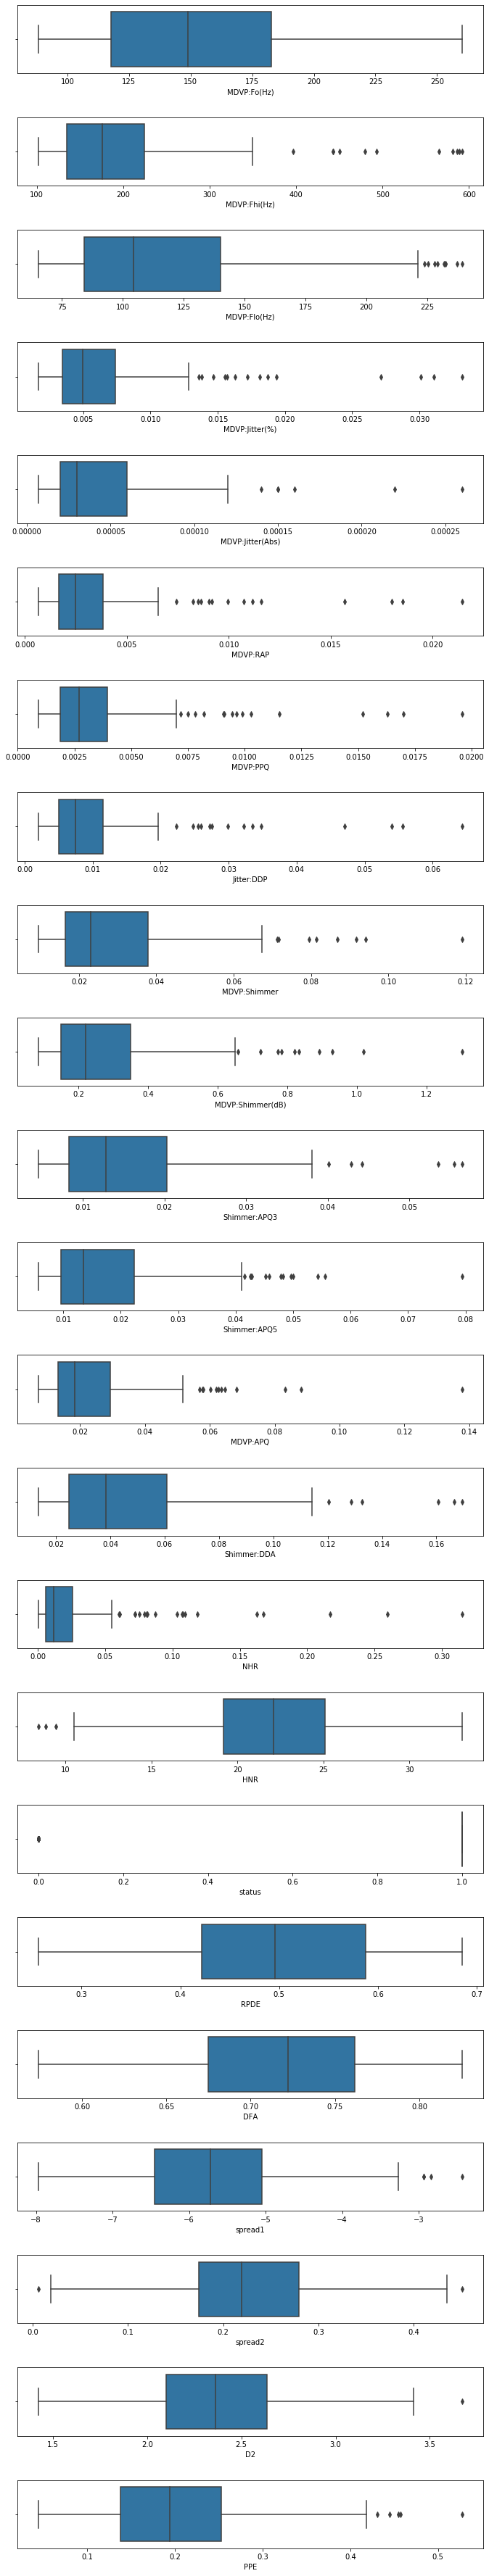

In [15]:
plt.figure(figsize= (10,50)) # To set the plot size.

plt.subplot(23,1,1)        # Here subplot function is used to arrange the plots one-by-one.
sns.boxplot(data1['MDVP:Fo(Hz)']) # This function creates boxplot as shown below to visualize the distribution of a data also gives visualization on the presence of outliers and five point summary.
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(23,1,2)
sns.boxplot(data1['MDVP:Fhi(Hz)'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(23,1,3)
sns.boxplot(data1['MDVP:Flo(Hz)'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(23,1,4)
sns.boxplot(data1['MDVP:Jitter(%)'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(23,1,5)
sns.boxplot(data1['MDVP:Jitter(Abs)'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(23,1,6)       
sns.boxplot(data1['MDVP:RAP']) 
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(23,1,7)
sns.boxplot(data1['MDVP:PPQ'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(23,1,8)
sns.boxplot(data1['Jitter:DDP'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(23,1,9)
sns.boxplot(data1['MDVP:Shimmer'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(23,1,10)
sns.boxplot(data1['MDVP:Shimmer(dB)'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(23,1,11)        
sns.boxplot(data1['Shimmer:APQ3'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(23,1,12)
sns.boxplot(data1['Shimmer:APQ5'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(23,1,13)
sns.boxplot(data1['MDVP:APQ'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(23,1,14)
sns.boxplot(data1['Shimmer:DDA'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(23,1,15)
sns.boxplot(data1['NHR'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(23,1,16)
sns.boxplot(data1['HNR'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(23,1,17)        
sns.boxplot(data1['status']) 
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(23,1,18)
sns.boxplot(data1['RPDE'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(23,1,19)
sns.boxplot(data1['DFA'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(23,1,20)
sns.boxplot(data1['spread1'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(23,1,21)
sns.boxplot(data1['spread2'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(23,1,22)
sns.boxplot(data1['D2'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(23,1,23)
sns.boxplot(data1['PPE'])
plt.tight_layout(pad=3.0) #To leave space between the plots. 

##### Inference on the above steps:
1. Threr are outliers in almost all features.
2. All above outliers are above maxium value.

##### Note:
1. Here, no outlier treatment is done because from above observation it can be noted that outliers are in positive side.
2. As this dataset is for classifying people with parkinson and non - parkinson, the elemination of outliers are not done without domain knowledge and without knowing important features because if any of the outlier in an important feature may contribute to the presence of parkinson disease. If future data appears in similar to the outlier, our model may not classify correctly. Therefore, the models futher to be built are made to learn the data with the prsense of outliers. 

==================================================================================================================

# Data Splitting:

#### Step 1: Seperating the data into Predictors and Labels:
1. x is for predictors.
2. y is label with class output.

In [3]:
x = data1.drop(['status','name'], axis=1) # Extracting the predictors alone.
y = data1['status'] #Extracting the class labels.

#### Step 2:Splitting the predictors and targets into training and testing data:
   Here we split the labels and feature into training (for training the model) and testing (for testing the model's predictability) samples in the 70:30 ratio.

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3,random_state=100)  # Splitting the data Cross Validation.

In [5]:
#Shape of the training Data:
print(x_train.shape)
print(y_train.shape)

(136, 22)
(136,)


In [6]:
#Shape of the testing Data:
print(x_test.shape)
print(y_test.shape)

(59, 22)
(59,)


##### Inference on the above steps:
  The data is seperated into label and feature and again split into train and test samples with 70:30 proportions respectively, so now we can train and test the model. 

#### Step 3: Nullifying the effect of different units of attributes:

There are few features with large scale which may suppress the other features so they need to be Normalized or scaled. Any data with attributes of different scales can be standardized using following methods:

        1. MinMaxScaler  - makes use of mininmum and maximum values of the data and gets affected by outlier but maintains the shape of the data. It gives Range from 0 to 1.
        
        2. StandardScaler - makes use of the mean and standard deviation of the data and aslo gets affectsd by outlier with implication of scaling. It dose not maintain the exact shape of the data.
        
        3. Robustscaler -Makes use of min and IQR of the data, it gives very high loss of data so it does not gets affected by outliers also does not maintain the shape of the data.
        
        With among three types, standard scaler is used for our analysis and model building purposes becuse of the advantage of normalizing the data along with implication of scling also among other two its range is much acceptable. 
    

In [7]:
a= StandardScaler() # in built normalizing function availble in sklearn. 

col = x_train.columns #Extracting the columns of features

x_train_1 = pd.DataFrame(a.fit_transform(x_train)) #Normalizing the training features.
x_test_1 = pd.DataFrame(a.fit_transform(x_test)) #normalizing the test features.

x_train_1.columns = col #assigning the normalized training features with the original data's feature name. 
x_test_1.columns = col #assigning the normalized testing features with the original data's feature name.

###### Visualizing the effect of Normalization:

Text(0.5, 1.0, 'Distribution plot for MDVP:Fo(Hz) before normalizing ')

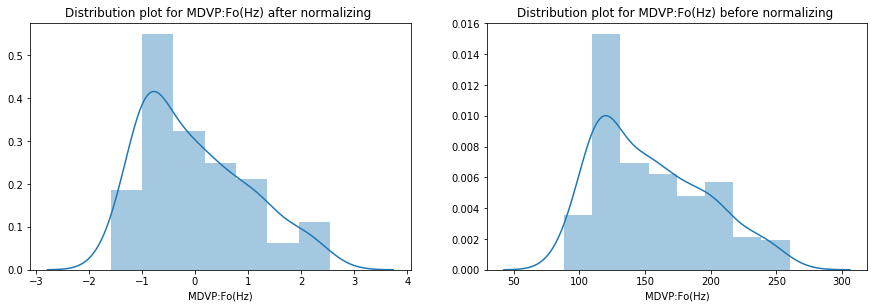

In [130]:
plt.figure(figsize= (15,10)) # To set the plot size.

plt.subplot(2,2,1)        # Here subplot function is used to arrange the plots one-by-one.
sns.distplot(x_train_1['MDVP:Fo(Hz)']) #To plot the distribution shape.
plt.title('Distribution plot for MDVP:Fo(Hz) after normalizing ')

plt.subplot(2,2,2)
sns.distplot(data1['MDVP:Fo(Hz)']) #To plot the distribution shape.
plt.title('Distribution plot for MDVP:Fo(Hz) before normalizing ')

##### Inference on the outputs:
      Therefore the effect of different attributes are removed by normalizing the all attributes. Which is also evident in the above plot that shape of the distribution is also slightly changed.

#### Step 3: Multicollinearity detection and elemination:
1. Based on the theoretical statement that "Multicollinearity is a problem for Linear models and also for Log and Cox regression if the predictors have very high correlation". In our case Predictors have the very high correlation so Multicollinearity need to be checked and multicollinear variables have to be removed for Logistic Regression. But, it is not done.

2. Above point was because upon checking the Variable Inflation Factor (VIF) it was found there was very high level of collinearity between variables even after at the end of several iteration of eleminating the most collinear variables. Without domain knowledge no risk of ommiting the features were taken in our modelling process either based on the VIF or checking the p-value.

3. The multicollinearity check done is not shown in order to display only the useful things to avoid confusion.

==================================================================================================================

# 6. Train at least 3 standard classification algorithms - Logistic Regression, Naive Bayes’, SVM, k-NN etc, and note down their accuracies on the test data (10 points),  

# 7. Train a meta-classifier and note the accuracy on test data (10 points) 

# 8. Train at least one standard Ensemble model - Random forest, Bagging, Boosting etc, and note the accuracy (10 points)

# Building Classification model using different algorithms:


## a. Logistic Regression:

###  Business Objective Based Model:
    To detect the patients with parkinson's disease and those who are healthy based on the various vocal measurement predictors given. Therefore, here we use Logistic regression, so that using the past data we create a Logistic regression classifier model that will classify prople based on the best threshold vlaue such that we can correctly target the patient to be treated and treat the need before tings get worse. Given attributes as input to the model it will give class output with probablity whether the patient will be affected or not based on which we can do target.

####  Step 1a: Model buliding using scikit-learn:


  The Logistic Regression model can also be built using the LogisticRegression module available in the Scikit-Learn.

In [40]:
# Fitting the model 
model = LogisticRegression(solver="liblinear") # making use of the inbuilt function of sklearn to build the logistic regression.
model.fit(x_train_1, y_train) # Fitting the training data into the model.

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

##### Inference on the above ouputs:
  In the above cell, model (logit function - Sigmoid Curve) was built using the LogisticRegression function in the sklearn package and the model was trained using training data.

####  Step 1b: Extracting the coefficients:

In [41]:
#Getting the Coefficients and intercept of the Log Reg model
coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)


          0        1         2         3        4         5         6  \
0 -0.110102 -0.37568 -0.408963 -0.508441 -0.54671  0.428405 -0.286952   

          7         8         9  ...        13        14        15        16  \
0  0.426826  0.260381  0.207478  ...  0.067489 -0.581483  0.020621 -0.665371   

         17        18        19        20        21  intercept  
0 -0.087415  0.918696  0.553123  0.974852  0.890703   2.034895  

[1 rows x 23 columns]


##### Inference on the above output:

   The coefficients can be used to determine the important features and tune the model further but above coefficients are in the exponential terms so they have to be converted to determine important features. Also as there is no domain knowledge to drop important features, further process is carried out without dropping any feature by assuming all the features are important.

#### Step 3: Performance of our model with training data:

In [42]:
y_predict_training_LR = model.predict(x_train_1) # predicting the class outputs using the training data of features. 
print("Model Accuracy: {0:.4f}".format(model.score(x_train_1, y_train))) #Measuring the accuraccy score of the model.

Model Accuracy: 0.8676


##### Inference on the above ouputs:
  Model  is capable of classifying and predicting the class output using the training data upto 86.76% accuracy, which is measureed by comparing actual and predicted output (predicted using the model). 

#### Step 4: Performance of our model with testing data:

In [43]:
y_predict_testing_LR = model.predict(x_test_1) # predicting the class outputs using the testing data of features.
print("Model Accuracy: {0:.4f}".format(model.score(x_test_1, y_test))) #Measuring the accuraccy score of the model.

Model Accuracy: 0.7966


##### Inference on the above ouputs:
  Model  is capable of classifying and predicting the class output using the testing data upto 79.66% accuracy which is lower than the score of the model with the training data, which is measureed by comparing actual and predicted(predicted using the model) output. A good model should perform well in the testing data than in the training data.
  This kind of performance may be due to:
  1. Imbalance in the data.
  2. High correlation between the features.
  3. Due to the presence of the outliers (reason for not performing outlier treatment is said above). 
  4. Skewness of the most of the features.

## b. KNN - Classifier:

### Business Objective Based Model:
   To detect the patients with parkinson's disease and those who are healthy based on the various vocal measurement predictors given. Therefore, here we use K Nearest Neighbours, so that using the past data we create a KNN model that will classify affected and unaffected people based on the majority of vote from K nearest neighbours such that we can correctly target the affected peoplr and treat them. Given attributes as input to the KNN model it will give class output as whether the patient will be affected or not based on which we can do target.

KNN algoritham works as follows:
1. Creates clssification of labels for their respective features using the training data.
2. Gets a query point as input.
3. Measures distance of the query point with all other data points.
4. Arranges the distance values in the ascening order.
5. Based on K value given in the model it take out the first K distance values arranged in ascending order.
6. In the first K distance value the algoritham looks for the presence of the majority class and the query point is classified to the majority class.

Note:
 In case the distance value is same with the K nearest points to break this tie, it is recommended to use the K value as odd numbers.

#### Step1: Creating odd list of K for KNN:
  It is important to have odd values of K for binary classification because if the distance values of two classes are same, to break this tie if we have odd value of K we can break the tie.

In [44]:
mylist = list(range(1,20)) #Creating list of values from 1 to 20.
kneigh = list(filter(lambda x: x % 2 != 0, mylist)) #Extracting odd values form the above values.
kneigh

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

##### Inference of the above output:
  We have created odd values of K in the range of 1 to 20

#### Step 2: Building the model using KNN algorithms:

In [45]:
ac_scores = [] #Creating empty list to store the accuracy scores that we are about to obtain.

for k in kneigh:
    knn = KNeighborsClassifier(n_neighbors=k,weights='distance') #Constructing the model using the inbuilt function of K nearest neighbors in sklearn package.
    knn.fit(x_train_1, y_train) #Trining the model using the training data.
    
    y_pred = knn.predict(x_test_1)# predicting the class output
    
    scores = accuracy_score(y_test, y_pred) #evaluating the accuracy score.
    ac_scores.append(scores) #Storing the accuracy scores to the above crated list
  
 #Creating the dataframe of accuracy scores and missclassification for various K values.
a = pd.DataFrame((ac_scores),columns = ['Accuracy Scores']) 
MSE = [1 - x for x in ac_scores]
 
a['MisClassification Error'] = MSE
a['K value'] = kneigh
a

Accuracy Scores  MisClassification Error  K value
0         0.830508                 0.169492        1
1         0.813559                 0.186441        3
2         0.813559                 0.186441        5
3         0.830508                 0.169492        7
4         0.864407                 0.135593        9
5         0.813559                 0.186441       11
6         0.847458                 0.152542       13
7         0.830508                 0.169492       15
8         0.847458                 0.152542       17
9         0.881356                 0.118644       19

##### Inference on the above output:
   We have created the model and built a dataframe that consist of Accuracy scores, MisClassification error for odd K values using the model built from KNN algorithm. 

#### Step 3: Deciding the optimal K value: 

Text(0, 0.5, 'Misclassification Error')

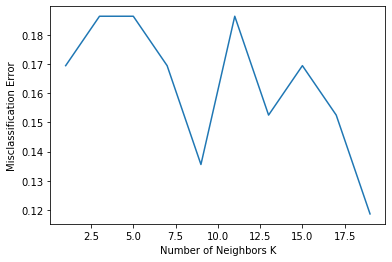

In [95]:
# determining best k value by ploting the K value vs misclassification error.
optimal_k = kneigh[MSE.index(min(MSE))]

plt.plot(kneigh, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')

##### Inference on the above output:
  From the above graph and DataFrame in previous step it can be found that the K value of 19 have very less missclassificaion error of 0.881356 which is comparitively less and accuracy of 0.118644 which is comparitively high.

#### Step 4: Constructing the final model : 
  Here we construct the final model with the optimum nearest neighbour value.

In [46]:
knn= KNeighborsClassifier(n_neighbors = 19) #Constructing the model using the inbuilt function of K nearest neighbors in sklearn package.
knn.fit(x_train_1, y_train) #Training the model using the training data.

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')

##### Inference on the above output:
1. We have constructed the final model with k value of 19 that uses eucledian distance to meaure the distance between the query and data points.
2. The model is trained with the training data.

#### Step 6: Performance of our model with training data:

In [47]:
y_train_pred_knn= knn.predict(x_train_1) # predicting the class output
print("Model Accuracy: {0:.4f}".format(accuracy_score(y_train,y_train_pred_knn))) #evaluating the accuracy score.

Model Accuracy: 0.8750


##### Inference on the above ouputs:
  Model  is capable of classifying and predicting the class output using the training data upto 87.50% accuracy, which is measured by comparing actual and predicted output (predicted using the model). 

#### Step 5: Performance of our model with testing data:

In [48]:
y_test_pred_knn= knn.predict(x_test_1) # predicting the class output
print("Model Accuracy: {0:.4f}".format(accuracy_score(y_test,y_test_pred_knn))) #evaluating the accuracy score.

Model Accuracy: 0.8475


##### Inference on the above ouputs:
  Model  is capable of classifying and predicting the class output using the testing data upto 84.75% accuracy which is lower than the score of the model with the training data, which is measureed by comparing actual and predicted(predicted using the model) output. A good model should perform well in the testing data than in the training data. This kind of performance may be due to:

  1. Imbalance in the data.
  2. High correlation between the features.
  3. Due to the presence of the outliers (reason for not performing outlier treatment is said above). 
  4. Skewness of the most of the features.

## c. Naive Bayes algorithm 

### Introduction:
       To detect the patients with parkinson's disease and those who are healthy based on the various vocal measurement predictors given. Therefore, here we use Naive bayes algorithm, its Naive because it makes assumption that the features are mutually Indepentent to each other  so that using the past data we create a Naive Bayes model that will classify customers based on the Naive Bayes Formul such that we can correctly target the customer and improve the converstion rate. Given attributes as input to the Naive Baye's model it will give class output as as whether the patient will be affected or not based on which we can do target.

     In the eager learner it is important take care of missing and null values because this will affect the classifier because they  are based on the probablities, therefore the data was priorly tested for the presence of null values and found there are no null values. If null values were ther we can apply laplace transformation and proceed in model building but here it is not requiered.

#### Step 1: Fitting the model:

In [49]:
# creating the model
GN = GaussianNB() #Constructing the model using the inbuilt function of Gaussian Naive Baye's in sklearn package.
GN.fit(x_train_1, y_train.ravel()) #Training the model using the training data.

GaussianNB(priors=None, var_smoothing=1e-09)

##### Inference on the above ouputs:
  In the above cell the Gaussia Naive Baye's model was built and trained using the training data. The biggest deifference between Gaussian Naive Bayes and above two algorithms is Gaussian Naive bayes is eager learner and other two are lazy learners. 

#### Step 2: Performance of our model with training data

In [50]:
y_train_pred__GN = GN.predict(x_train_1) # predicting the class output
print("Model Accuracy: {0:.4f}".format(GN.score(x_train_1,y_train))) #evaluating the accuracy score.


Model Accuracy: 0.7353


##### Inference on the above ouputs:
  Model  is capable of classifying and predicting the class output using the training data upto 73.53% accuracy, which is measured by comparing actual and predicted output (predicted using the model). 

#### Step 3: Performance of our model with testing data

In [51]:
y_test_pred__GN = GN.predict(x_test_1) # predicting the class output
print("Model Accuracy: {0:.4f}".format(GN.score(x_test_1,y_test))) #evaluating the accuracy score.


Model Accuracy: 0.6271


##### Inference on the above ouputs:
   Model  is capable of classifying and predicting the class output using the testing data upto 62.71% accuracy which is lower than the score of the model with the training data, which is measureed by comparing actual and predicted(predicted using the model) output. A good model should perform well in the testing data than in the training data. This kind of performance may be due to:

  1. Imbalance in the data.
  2. High correlation between the features.
  3. Due to the presence of the outliers (reason for not performing outlier treatment is said above). 
  4. Skewness of the most of the features.

## d. Decession Tree Classifier:

### Introduction:
       To detect the patients with parkinson's disease and those who are healthy based on the various vocal measurement predictors given. Therefore, here we use Naive bayes algorithm, its Naive because it makes assumption that the features are mutually Indepentent to each other  so that using the past data we create a Naive Bayes model that will classify customers based on the Naive Bayes Formul such that we can correctly target the customer and improve the converstion rate. Given attributes as input to the Naive Baye's model it will give class output as as whether the patient will be affected or not based on which we can do target.

#### Step a: Building the model:

In [9]:
dtree_pru = DecisionTreeClassifier(criterion='gini',max_depth = 3,random_state= 1) #Making use of the inbuilt function from the sklearn.
d_tree_pru = dtree_pru.fit(x_train_1,y_train) #Fitting the model with training data.

##### Inference on the above output:

1. The model is built arbitrarly using the gini criterion.
2. The model is also pruned to depth of 3, to avoid overfitting because if thee tree learns completely then it will give accuracy as 100%

#### Step b: Visualizing the model:

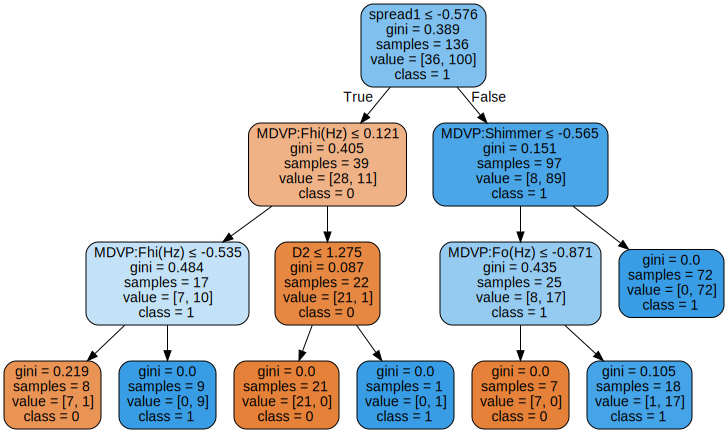

In [10]:
dot_data = tree.export_graphviz(d_tree_pru, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("d_tree") 

dot_data = tree.export_graphviz(d_tree_pru, out_file=None, 
                     feature_names=x_train_1.columns,  
                     class_names= ['0','1'],  
                      filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

#### Step 2: Performance of our model with training data

In [11]:
print("Model Accuracy: {0:.4f}".format(dtree_pru.score(x_train_1,y_train))) #evaluating the accuracy score.

Model Accuracy: 0.9853


##### Inference on the above ouputs:
  Model  is capable of classifying and predicting the class output using the training data upto 86.03% accuracy, which is measured by comparing actual and predicted output (predicted using the model). 

#### Step 3: Performance of our model with testing data

In [12]:
print("Model Accuracy: {0:.4f}".format(dtree_pru.score(x_test_1,y_test))) #evaluating the accuracy score.

Model Accuracy: 0.8475


##### Inference on the above ouputs:
   Model  is capable of classifying and predicting the class output using the testing data upto 79.66% accuracy which is lower than the score of the model with the training data, which is measureed by comparing actual and predicted(predicted using the model) output. A good model should perform well in the testing data than in the training data. This kind of performance may be due to:

  1. Imbalance in the data.
  2. High correlation between the features.
  3. Due to the presence of the outliers (reason for not performing outlier treatment is said above). 
  4. Skewness of the most of the features.

       
       An attempt is made to see whether we are capable of obtaining improved performance by tuning the hyperparameters using gridsearchCV.

#### Hypertuning the Prameters:

In [13]:
# Tuning the Hyperparameters:
params_grid =[{"criterion":['gini'], "max_depth":[1,2,3]},{"criterion":['entropy'], "max_depth":[1,2,3]}]
dtree_ = DecisionTreeClassifier(random_state=1)
dTreeR = GridSearchCV(dtree_,params_grid)
#Fitting the model:
dt_fit = dTreeR.fit(x_train_1,y_train)
dt_fit

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=1,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'criterion': ['gini'], 'max_depth': [1, 2, 3]},
                         {'criterion': ['entropy'], 'max_dep

##### Inference on the above output:

 In the above cell Decision Classifier's model building process was carried out by tuning the hyperparameters like criterion and max_depth. 

#### Obtaining the best estimator and best parameters:

In [14]:
dt_fit.best_estimator_ #Gives best estimators.

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [15]:
dt_fit.best_params_ #Extracting the best parameters.

{'criterion': 'gini', 'max_depth': 3}

##### Inference on the above output:

1. It can be seen that tuning the hyper parameters also gives the same hyperparameters which was tried already. Therefore, we will get the same performance of the model if we measure accuracy on both training and testing data.

#### Performance on Training data:

In [16]:
dt_fit.best_score_ #extracfting the accuracy on training data.

0.8455882352941176

##### Inference on the above ouputs:
  Model  is capable of classifying and predicting the class output using the training data upto 84.55% accuracy, which is measured by comparing actual and predicted output (predicted using the model). 

#### Performance on Testing data:

In [17]:
y_test_pred_dt = dt_fit.predict(x_test_1) 
print("Model Accuracy: {0:.4f}".format(accuracy_score(y_test, y_test_pred_dt))) #evaluating the accuracy score.

Model Accuracy: 0.8475


##### Inference on the above ouputs:
   Model  is capable of classifying and predicting the class output using the testing data upto 84.75% accuracy which is better than the performance value on the training data.

#### Calculating the Important Features:

In [97]:
feat_imp_dict = dict(zip(x_train_1.columns, d_tree_pru.feature_importances_)) #Extracting the important features.
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

0
spread1           0.455676
MDVP:Fhi(Hz)      0.246150
MDVP:Fo(Hz)       0.182367
MDVP:Shimmer      0.077084
D2                0.038722
MDVP:APQ          0.000000
spread2           0.000000
DFA               0.000000
RPDE              0.000000
HNR               0.000000
NHR               0.000000
Shimmer:DDA       0.000000
Shimmer:APQ5      0.000000
Shimmer:APQ3      0.000000
MDVP:Shimmer(dB)  0.000000
Jitter:DDP        0.000000
MDVP:PPQ          0.000000
MDVP:RAP          0.000000
MDVP:Jitter(Abs)  0.000000
MDVP:Jitter(%)    0.000000
MDVP:Flo(Hz)      0.000000
PPE               0.000000

##### Inference on the above output:
 It can be seen that out of 23 features only four features spread1, MDVP:Fhi(Hz), MDVP:Fo(Hz), MDVP:Shimmer and D2 are important in determining whether a patient is healthy or affected by Parkinsons. 

#### Next, we try to construct a model using ensemble technques and see is there any model performance improvement.

## e.Random Forest:

### Introduction:
       To detect the patients with parkinson's disease and those who are healthy based on the various vocal measurement predictors given. Therefore, here we use Random Forest - constructing bunch of tress, so that using the past data we create a Random Forest model that will construct bunch of tress and find the best model out of many and classify the affected and healthy people. Given attributes as input to the Random Forest's model it will give class output as as whether the patient will be affected or not based on which we can do target.

#### Step 1: Building the model using Hyperparameter tuning:

In [18]:
# Building the model using hyperparameter tuning:
params_grid =[{"criterion":['gini'],"n_estimators":[x for x in np.arange(10,101)],"max_features":[x for x in np.arange(10,21)]},{"criterion":['entropy'],"n_estimators":[x for x in np.arange(10,101)],"max_features":[x for x in np.arange(10,21)]}]
raf = RandomForestClassifier(random_state=1)
ra_f = GridSearchCV(raf,params_grid)
#Fitting the training data into the model:
ra_f.fit(x_train_1,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_sco...
                          'n_estimators': [10, 11, 12, 13, 14, 15, 16, 17, 18,
                                           19, 20, 21, 22, 23, 24, 25, 26, 27,


##### Inference on the above output:

 In the above cell RandomForest Classifier's model building process was carried out by tuning the hyperparameters like criterion and max_depth. 

#### Step 2: Fetching the best estimators and best parameters:

In [19]:
ra_f.best_estimator_ #Fetching the best estimators from the hypertuned model.

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=32,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [20]:
ra_f.best_params_ #Extracting the best parameters.

{'criterion': 'entropy', 'max_features': 10, 'n_estimators': 32}

##### Inference on the above output:

  Therefore we have fetched the best parameters py tuning the hyperparameters annd the best parameters are shown above.

#### Step 3: Performance on Training data:

In [21]:
ra_f.best_score_ #extracfting the accuracy on training data.

0.9264705882352942

##### Inference on the above ouputs:
  Model  is capable of classifying and predicting the class output using the training data upto 92.64% accuracy, which is measured by comparing actual and predicted output (predicted using the model). 

#### Step 4: Performance on Testing data:

In [22]:
y_test_pred_raf = ra_f.predict(x_test_1) #Predicting the Class Output for the test data.
print("Model Accuracy: {0:.4f}".format(accuracy_score(y_test, y_test_pred_raf))) #evaluating the accuracy score.

Model Accuracy: 0.8136


##### Inference on the above ouputs:
   Model  is capable of classifying and predicting the class output using the testing data upto 81.36% accuracy which is lower than the score of the model with the training data, which is measureed by comparing actual and predicted(predicted using the model) output. A good model should perform well in the testing data than in the training data. This kind of performance may be due to:

  1. Imbalance in the data.
  2. High correlation between the features.
  3. Due to the presence of the outliers (reason for not performing outlier treatment is said above). 
  4. Skewness of the most of the features.

## f. Bagging Classifier:

  Fetchest best model for a given base estimator by building the model parallely.

### Introduction:
       To detect the patients with parkinson's disease and those who are healthy based on the various vocal measurement predictors given. Therefore, here we use Bagging Clssifier, so that using the past data we create a Bagging classifier determined model that will construct models in various algorithms and find the best model out of many also classify the affected and healthy people. Given attributes as input to the Bagging Classified model will give class output as whether the patient will be affected or not based on which we can do target.

#### Step 1: Building the model by tuning the hyper parameter:

In [23]:
# Building the model using hyperparameter tuning:
params_grid =[{"base_estimator":[LogisticRegression()],"n_estimators":[x for x in np.arange(10,51)]},
              {"base_estimator":[KNeighborsClassifier()],"n_estimators":[x for x in np.arange(10,51)]},
             {"base_estimator":[SVC()],"n_estimators":[x for x in np.arange(10,51)]},
             {"base_estimator":[GaussianNB()],"n_estimators":[x for x in np.arange(10,51)]}]
bag=BaggingClassifier( max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bag_parallel = GridSearchCV(bag,params_grid)
#Fitting the training data into the model:
bag_parallel.fit(x_train_1,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
                                         bootstrap_features=False,
                                         max_features=1.0, max_samples=0.7,
                                         n_estimators=10, n_jobs=None,
                                         oob_score=True, random_state=22,
                                         verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'base_estimator': [LogisticRegression(C=1.0,
                                                                class_we...
                          'n_estimators': [10, 11, 12, 13, 14, 15, 16, 17, 18,
                                           19, 20, 21, 22, 23, 24, 25, 26, 27,
                                           28, 29, 30, 31, 32, 33, 34, 35, 36,
                                           37, 38, 39, ...]},
                      

##### Inference on the above output:

In the above cell the model's hyperparameters like base estimators and no.of estimators are tuned for different algos and different depths respectively. But here base estimator was not tuned using decisssion tree classifier becase random forest classifier is already used for model building.

#### Step 2: Fetching the best estimators and best parameters:

In [24]:
bag_parallel.best_estimator_ #Fetching the best estimators from the hypertuned model.

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=5, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=0.7, n_estimators=10, n_jobs=None, oob_score=True,
                  random_state=22, verbose=0, warm_start=False)

In [25]:
bag_parallel.best_params_ #Extracting the best parameters.

{'base_estimator': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                      weights='uniform'), 'n_estimators': 10}

##### Inference on the above output:

  Therefore we have fetched the best parameters py tuning the hyperparameters annd the best parameters are shown above.

#### Step 3: Performance on Training data:

In [26]:
bag_parallel.best_score_ #extracfting the accuracy on training data.

0.9044117647058824

##### Inference on the above ouputs:
  Model  is capable of classifying and predicting the class output using the training data upto 90.44% accuracy, which is measured by comparing actual and predicted output (predicted using the model). 

#### Step 4: Performance on Testing data:

In [27]:
y_test_pred_bag_parallel = bag_parallel.predict(x_test_1) #Predicting the Class Output for the test data. 
print("Model Accuracy: {0:.4f}".format(accuracy_score(y_test, y_test_pred_bag_parallel))) #evaluating the accuracy score.

Model Accuracy: 0.7966


##### Inference on the above ouputs:
   Model  is capable of classifying and predicting the class output using the testing data upto 79.66% accuracy which is lower than the score of the model with the training data, which is measureed by comparing actual and predicted(predicted using the model) output. A good model should perform well in the testing data than in the training data. This kind of performance may be due to:

  1. Imbalance in the data.
  2. High correlation between the features.
  3. Due to the presence of the outliers (reason for not performing outlier treatment is said above). 
  4. Skewness of the most of the features.

## g.Boosting Classifier:

 Fetchest best model for a given base estimator by building the model sequentially.

### Introduction:
       To detect the patients with parkinson's disease and those who are healthy based on the various vocal measurement predictors given. Therefore, here we use Boosting Clssifier, so that using the past data we create a Boosting classifier determined model that will construct models in various algorithms and find the best model out of many also classify the affected and healthy people. Given attributes as input to the Boosting Classified model will give class output as whether the patient will be affected or not based on which we can do target.

#### Step 1: Building the model by tuning the hyper parameter:

In [28]:
from sklearn.tree import DecisionTreeClassifier
# Building the model using hyperparameter tuning:
params_grid =[{"base_estimator":[LogisticRegression()],"n_estimators":[x for x in np.arange(10,101)]},
             {"base_estimator":[SVC()],"n_estimators":[x for x in np.arange(10,51)]},
             {"base_estimator":[GaussianNB()],"n_estimators":[x for x in np.arange(10,51)]},
             {"base_estimator":[DecisionTreeClassifier()],"n_estimators":[x for x in np.arange(10,51)]}]
boost_ada =AdaBoostClassifier(learning_rate=0.1, random_state=2,algorithm='SAMME')
boost_ada_seq = GridSearchCV(boost_ada,params_grid)
#Fitting the training data into the model:
boost_ada_seq.fit(x_train_1,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME',
                                          base_estimator=None,
                                          learning_rate=0.1, n_estimators=50,
                                          random_state=2),
             iid='warn', n_jobs=None,
             param_grid=[{'base_estimator': [LogisticRegression(C=1.0,
                                                                class_weight=None,
                                                                dual=False,
                                                                fit_intercept=True,
                                                                intercept_scaling=1,
                                                                l1_ratio=None,
                                                                max_iter=100,
                                                                mult...
                

##### Inference on the above output:

In the above cell the model's hyperparameters like base estimators and n_estimators are tuned for different algos and different no.of estimators respectively.  

#### Step 2: Fetching the best estimators and best parameters:

In [29]:
boost_ada_seq.best_estimator_ #Fetching the best estimators from the hypertuned model.

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                            

In [30]:
boost_ada_seq.best_params_ #Extracting the best parameters.

{'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=None, splitter='best'),
 'n_estimators': 10}

##### Inference on the above output:

  Therefore we have fetched the best parameters py tuning the hyperparameters annd the best parameters are shown above.

#### Step 3: Performance on Training data:

In [31]:
boost_ada_seq.best_score_ #extracfting the accuracy on training data.

0.8676470588235294

##### Inference on the above ouputs:
  Model  is capable of classifying and predicting the class output using the training data upto 86.76% accuracy, which is measured by comparing actual and predicted output (predicted using the model). 

#### Step 4: Performance on Testing data:

In [32]:
y_test_pred_boost_ada_seq = boost_ada_seq.predict(x_test_1) #Predicting the Class Output for the test data.
print("Model Accuracy: {0:.4f}".format(accuracy_score(y_test, y_test_pred_boost_ada_seq))) #evaluating the accuracy score.

Model Accuracy: 0.8475


##### Inference on the above ouputs:
   Model  is capable of classifying and predicting the class output using the testing data upto 84.75% accuracy which is lower than the score of the model with the training data, which is measureed by comparing actual and predicted(predicted using the model) output. A good model should perform well in the testing data than in the training data. This kind of performance may be due to:

  1. Imbalance in the data.
  2. High correlation between the features.
  3. Due to the presence of the outliers (reason for not performing outlier treatment is said above). 
  4. Skewness of the most of the features.

## h. Support Vector Classifier:

### Introduction:
       To detect the patients with parkinson's disease and those who are healthy based on the various vocal measurement predictors given. Therefore, here we use Support Vector Classifier, so that using the past data we create a SVM model that will construct model and classify the affected and healthy people. Given attributes as input to the SVM model will give class output as whether the patient will be affected or not based on which we can do target.

#### Step 1: Building the model by tuning the hyper parameter:

In [33]:
# Building the model using hyperparameter tuning:
params_grid =[{"C":[0.01,10,100],"kernel":['linear']},
             {"C":[0.01,10,100],"gamma":[0.1,0,10],"kernel":['rbf']}]
supp =SVC( probability=True)
supp_vec = GridSearchCV(supp,params_grid)
#Fitting the training data into the model:
supp_vec.fit(x_train_1,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.01, 10, 100], 'kernel': ['linear']},
                         {'C': [0.01, 10, 100], 'gamma': [0.1, 0, 10],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

##### Inference on the above output:

In the above cell the model's hyperparameters like kernels, C and gamma are tuned, among different kernel types like polynomial, sigmoid, linear and rbf only linear and rbf were only passed as hyperparameters for tuning. 

#### Step 2: Fetching the best estimators and best parameters:

In [34]:
supp_vec.best_estimator_ #Fetching the best estimators from the hypertuned model.

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [35]:
supp_vec.best_params_ #Extracting the best parameters.

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

##### Inference on the above output:

  Therefore we have fetched the best parameters py tuning the hyperparameters annd the best parameters are shown above.

#### Step 3: Performance on Training data:

In [36]:
supp_vec.best_score_ #extracfting the accuracy on training data.

0.9338235294117647

##### Inference on the above ouputs:
  Model  is capable of classifying and predicting the class output using the training data upto 93.38% accuracy, which is measured by comparing actual and predicted output (predicted using the model). 

#### Step 4: Performance on Testing data:

In [37]:
y_test_pred_supp_vec = supp_vec.predict(x_test_1)  #Predicting the Class Output for the test data.
print("Model Accuracy: {0:.4f}".format(accuracy_score(y_test, y_test_pred_supp_vec))) #evaluating the accuracy score.

Model Accuracy: 0.8814


##### Inference on the above ouputs:
   Model  is capable of classifying and predicting the class output using the testing data upto 88.14% accuracy which is lower than the score of the model with the training data, which is measureed by comparing actual and predicted(predicted using the model) output. A good model should perform well in the testing data than in the training data. This kind of performance may be due to:

  1. Imbalance in the data.
  2. High correlation between the features.
  3. Due to the presence of the outliers (reason for not performing outlier treatment is said above). 
  4. Skewness of the most of the features.

#### Sumarizing the accuracy of the models on the test data:

In [79]:
pd.DataFrame({'Classifiers':['LogisticRegression', 'KNearestNeighbours','Naive Bayes', 'Decission Tree', 'RandomForest', 'Bagging', 'AdaBoosting', 'Support Vector Classifier'],'Accracy of the model on testing data (in %)':[model.score(x_test_1, y_test)*100, accuracy_score(y_test,y_test_pred_knn)*100, GN.score(x_test_1,y_test)*100, accuracy_score(y_test, y_test_pred_dt)*100, accuracy_score(y_test, y_test_pred_raf)*100, accuracy_score(y_test, y_test_pred_bag_parallel)*100, accuracy_score(y_test, y_test_pred_boost_ada_seq)*100, accuracy_score(y_test, y_test_pred_supp_vec)*100 ]})

Classifiers  Accracy of the model on testing data (in %)
0         LogisticRegression                                    79.661017
1         KNearestNeighbours                                    84.745763
2                Naive Bayes                                    62.711864
3             Decission Tree                                    84.745763
4               RandomForest                                    81.355932
5                    Bagging                                    79.661017
6                AdaBoosting                                    84.745763
7  Support Vector Classifier                                    88.135593

##### Inference on the above output:
 It can be seen from the above tabel that model built using Suport Vector Classifier gives highest accuracy on the test data.

## i. Stacking Classifier:

### Introduction:
       To detect the patients with parkinson's disease and those who are healthy based on the various vocal measurement predictors given. Therefore, here we use Stacking Classifier, so that using the past data we create a meta model that will construct model and classify the affected and healthy people. Given attributes as input to the level one model and their predictions as input to the meta model will give class output as whether the patient will be affected or not based on which we can do target.

#### Step 1: Building the model by tuning the hyper parameter:
    
     Initially we build level one classifiers, the algorithms for those classifiers are those that were used to build model in the previous steps. The parameters are hyperparameters that were found to be best in the previous steps are again used for the classifiers given as input in the level one classification and thier predictors are passed to build a meta - classifier. Here the meta-clasifier used is Support Vector Classifier algorithm, the choice of SVC was based on the result of models accuracy performance on the training data which was measured in the above steps. 

In [13]:
# Building Level one classifier:
cl1 = LogisticRegression(solver="liblinear") # logistic Regression.

cl2 = KNeighborsClassifier(n_neighbors = 19) # K nearest neighbour.

cl3 = GaussianNB() # Gaussian Naive Bayes

#Decission Tree classifier
cl4 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

#Random Forest Classsifier
cl5 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=32,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

#Bagging Classifier
cl6 = BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=5, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=0.7, n_estimators=10, n_jobs=None, oob_score=True,
                  random_state=22, verbose=0, warm_start=False)

#Boosting Clasiifier
cl7 = AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                                                         splitter='best'),
                   learning_rate=0.1, n_estimators=10, random_state=2)

# Building Meta Classifier model:
met_cl = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)  #Support Vector Classifier.

# Stacking the level one classifiers and building the stacking classifier using the inbuilt func available in the mlxtend.classifier.
stac_cl = StackingClassifier(classifiers=[cl1, cl2, cl3, cl4, cl5, cl6, cl7],
                          meta_classifier= met_cl)


##### Inference of the above output:
 The stacking classifiers are built and are ready to get trained and undergo cross validation to measure the model performance.

#### Step 2.: Cross validation:

In [14]:
print('3-fold cross validation:\n')

for clf, label in zip([cl1, cl2, cl3, cl4, cl5, cl6, cl7, met_cl], 
                      ['Log_Reg', 'KNN', 'Naive Bayes', 'Decission Tree', 'Random Forest', 'Bagging Clf', 'AdaBoosting',                     
                       'StackingClassifier']):

    scores = cross_val_score(clf, x, y, cv=3, scoring='accuracy') # Performing  3 fold cross-validation parallely measuring the accuracy of the models.
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

3-fold cross validation:

Accuracy: 0.84 (+/- 0.06) [Log_Reg]
Accuracy: 0.79 (+/- 0.05) [KNN]
Accuracy: 0.68 (+/- 0.01) [Naive Bayes]
Accuracy: 0.79 (+/- 0.06) [Decission Tree]
Accuracy: 0.83 (+/- 0.05) [Random Forest]
Accuracy: 0.80 (+/- 0.05) [Bagging Clf]
Accuracy: 0.85 (+/- 0.08) [AdaBoosting]
Accuracy: 0.75 (+/- 0.00) [StackingClassifier]


##### Inference on the above output:
1. The model was cross validated.
2. The models were also measured on their accuracy.
3. The cross validation was carried out in the three folds manner.
4. It can be found that the Stacking Classifier (i.e) our meta classifier -  Support Vector Classifier have accuracy without any deviation.

=====================================================================================================================

# 9. Compare all the models (minimum 5) and pick the best one among them (10 points)

# Evaluating the model skill built using above all algorithms and compring the model performance using the Confusion Matrix:

 A confusion Matrix consists of four values, they are:
 1. True Positives (TP) - Predicted as Yes and Actual is also Yes.
 2. True Negatives (TN) - Predicted as No and Actual is also No.
 3. False Positives (FP) - Predicted as Yes but Actual is No.
 4. False negatives (FN) - Predicted as No but Actual is Yes.

Combination of above gives various performance measure which can be choosen to measure the model based on the business objective. The following are the measures available.

#### 1. Accuracy:

                                                  (TP+TN)/(TP+TN+FP+FN)

a. It tells how accurate the model give its predictions.


b. This measure can be used if our business objective is more conserned on both TP and TN.

c. But the Accuracy gets affected if TN is more dominating.

c. In most of the cases TNs will not be a major requierement.

####  If our business case is more concerned on only TP then it is necessary to decide whether as False Positive Prediction incurs the cost or a False Negative Prediction is going to incur a high cost:



#### 2. Precision:

                                               TP/(FP+TP) 

a. If the cost of the False Positive is high then we need to judge the model performance based on a Precision.

b. Precision measures the model in terms of "out of total prediction what was the proportion that actual positive cases or senarios were predicted correctly as positive by the model.

c. If the Precision value is low then it could be understood that FP is high, then model need to be judged accordingly because
we choose precision to measure the model as our business objective gets affected if the FP is high.

#### 3. Recall / Sensitivity / True Positive Rate:

                                              TP/(FN+TP)

a. For business objective if the cost of Flase Negative is high we need to judge the model performance based on a Recall.

b. Recall measures the model in terms of "out of total actual positive cases or senarios what was the proportion that were predicted correctly as positive by the model.

c. If the Recall value is low then it could be understood that FN is high, then model need to be judged accordingly because
we choose Recall to measure the model as our business objective gets affected if the FN is high.

#### 4. F1 Measure:



                                         [2*((Precision*Recall))]/[(Precision+Recall)]

a. If our objective is to balance the cost of both FP and FN then we choose a measure called F1 meaure.

b. F1 is a measure of harmonic mean of Precision and Recall.

#### 5. True Negative Rate / Specivity:

                                              TN/(TN+FP)

a. It measures in terms of "out of actually no cases what is the proportion the model as predicted as no"

#### 6. Classsification Error:

                                                  1 - Accuracy

a. This tells how much error does the model make on classification.

b. It is greately dependent on FP and FN.

c. Normally classification error need to be lower.

##### Being said about all measures in general, now for our Thera bank's classifying the customers to target marketing:
1. It is necessary that our model should correctly predict the Patients with Parkinson's disease using the vocal based attributes. 
2. For our clinincal scenario True Positive value is much important by having balance on both False Positive and False negative value. 
3. If False Positive value is high then we may end-up with targetting people who are not affected and start treating them, which will make our resources (money and cost) wasted. 
4. If FN value is high we may loose real patients who will suffer if treatment is not provided to them, which will be the worst case scenario.
  
 Therefore, we need to make use of the F1 Measure to measure the model performance.

### 1. Evaluating the model skill built of above three algorithms:

The skill of the above built models can be measured using the ROC curves and Precision Recall curves:
1. ROC Curve evaluates a model well if the class output datas are balanced.
2. Precision-Recall curve evaluates a model's skill well if the class outputs are not balanced and if the classification is binary classification.


The reason of not using the ROC curve for imbalance data is:
1. It is Based on the True Positive Rate and False Positive rate, where False positive Rate gets influenced due to True negatives, if TN is high FPR values becomes smaller and vice-versa.

2. ROC plots in the context of imbalanced datasets can be deceptive with respect to conclusions about the reliability of classification performance, owing to an intuitive but wrong interpretation of specificity.

3. Precision-recall curve plots, on the other hand, can provide the viewer with an accurate prediction of future classification performance due to the fact that they evaluate the fraction of true positives among positive predictions.

4. Also based on the research outcomes of researchers Jess davis and Mark Goadrich stated in their journal says that it is better to use Precision - Recall curve for evaluating the model when the features of the model are highly skewed. 

5. Also, the nature of claculation of precision and recall is dependent on the TP, FP and FN but not TN. Therefore, in the binary classification dataset when negative class records are larger than the poitive classes there will be large influence of TN so it is better to avoid ROC plot to meaure the skill of the models and use Precision - Recall plot.

      Based on the above points for our dataset and models, eventhought we have less negative class compared to that of the number of positive classes but there are features that are highly skewed, so it is decided to use Precision - Recall curve to evaluate the model skill. It is also decided to use Precision - Recall curve to evaluate the model skill eventhough we have in our data very less number of negative class based on the research output stated in the fourth point says that ROC curve and Precission-Recall curves share the smae space so we can use Precision - Recall graph to eveluate the model skill.


#### Step 1: Checking the class output imbalance:

In [84]:
data1['status'].value_counts() #This gives the count of two binary classes.

1    147
0     48
Name: status, dtype: int64

##### Inference on the above output:
     There is a difference of 99 records between the two classes. Therefore, there is a high imbalance in the data. 

#### Step 2:  Evaluating the model skill of Logistic Regression Model algo:

####  1. Precision-Recall graph:

Logistic: f1=0.870 auc=0.940


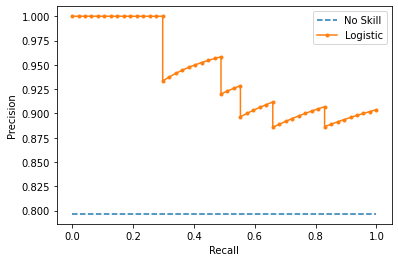

In [52]:
# predicting probabilities
lr_probs = model.predict_proba(x_test_1)
# keeping probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predicting class values
yhat = model.predict(x_test_1)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarizing the scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plotting the precision-recall curves
no_skill_lr = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill_lr, no_skill_lr], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
# showing the legend
plt.legend()
# showing the plot
plt.show()

#### Step 3: Evaluating the model skill of KNN algo:

####  1. Precision-Recall graph:

KNN: f1=0.907 auc=0.927


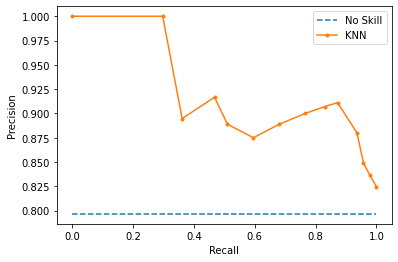

In [55]:
# predicting probabilities
knn_probs = knn.predict_proba(x_test_1)
# keeping probabilities for the positive outcome only
knn_probs = knn_probs[:, 1]
# predicting class values
yhat = knn.predict(x_test_1)
knn_precision, knn_recall, _ = precision_recall_curve(y_test, knn_probs)
knn_f1, knn_auc = f1_score(y_test, yhat), auc(knn_recall, knn_precision)
# summarizing scores
print('KNN: f1=%.3f auc=%.3f' % (knn_f1, knn_auc))
# plotting the precision-recall curves
no_skill_knn = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill_knn, no_skill_knn], linestyle='--', label='No Skill')
plt.plot(knn_recall, knn_precision, marker='.', label='KNN')
plt.xlabel('Recall')
plt.ylabel('Precision')
# showing the legend
plt.legend()
# showing the plot
plt.show()

#### Step 4: Evaluating the model skill of Naive bayes algo:

####  1. Precision-Recall graph:

GN: f1=0.711 auc=0.931


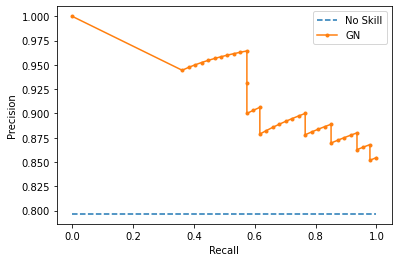

In [57]:
# predicting probabilities
GN_probs = GN.predict_proba(x_test_1)
# keeping probabilities for the positive outcome only
GN_probs = GN_probs[:, 1]
# predicting class values
yhat = GN.predict(x_test_1)
GN_precision, GN_recall, _ = precision_recall_curve(y_test, GN_probs)
GN_f1, GN_auc = f1_score(y_test, yhat), auc(GN_recall, GN_precision)
# summarizing scores
print('GN: f1=%.3f auc=%.3f' % (GN_f1, GN_auc))
# plotting the precision-recall curves
no_skill_GN = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill_GN, no_skill_GN], linestyle='--', label='No Skill')
plt.plot(GN_recall, GN_precision, marker='.', label='GN')
plt.xlabel('Recall')
plt.ylabel('Precision')
# showing the legend
plt.legend()
# showing the plot
plt.show()

#### Step 5: Evaluating the model skill of Decision Tree algo:

####  1. Precision-Recall graph:

Decission Tree: f1=0.903 auc=0.937


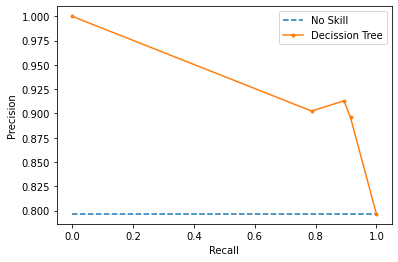

In [59]:
# predicting probabilities
dt_fit_probs = dt_fit.predict_proba(x_test_1)
# keeping probabilities for the positive outcome only
dt_fit_probs = dt_fit_probs[:, 1]
# predicting class values
yhat = dt_fit.predict(x_test_1)
dt_fit_precision, dt_fit_recall, _ = precision_recall_curve(y_test, dt_fit_probs)
dt_fit_f1, dt_fit_auc = f1_score(y_test, yhat), auc(dt_fit_recall, dt_fit_precision)
# summarizing scores
print('Decission Tree: f1=%.3f auc=%.3f' % (dt_fit_f1, dt_fit_auc))
# plotting the precision-recall curves
no_skill_dt_fit = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill_dt_fit, no_skill_dt_fit], linestyle='--', label='No Skill')
plt.plot(dt_fit_recall, dt_fit_precision, marker='.', label='Decission Tree')
plt.xlabel('Recall')
plt.ylabel('Precision')
# showing the legend
plt.legend()
# showing the plot
plt.show()

#### Step 6: Evaluating the model skill of Random Forest algo:

####  1. Precision-Recall graph:

Ranndom forest: f1=0.882 auc=0.958


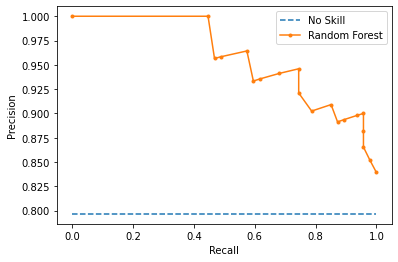

In [61]:
# predicting probabilities
ra_f_probs = ra_f.predict_proba(x_test_1)
# keeping probabilities for the positive outcome only
ra_f_probs = ra_f_probs[:, 1]
# predicting class values
yhat = ra_f.predict(x_test_1)
ra_f_precision, ra_f_recall, _ = precision_recall_curve(y_test, ra_f_probs)
ra_f_f1, ra_f_auc = f1_score(y_test, yhat), auc(ra_f_recall, ra_f_precision)
# summarizing scores
print('Ranndom forest: f1=%.3f auc=%.3f' % (ra_f_f1, ra_f_auc))
# plotting the precision-recall curves
no_skill_ra_f = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill_ra_f, no_skill_ra_f], linestyle='--', label='No Skill')
plt.plot(ra_f_recall, ra_f_precision, marker='.', label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
# showing the legend
plt.legend()
# showing the plot
plt.show()

#### Step 7: Evaluating the model skill of Bagging Classifier algo:

####  1. Precision-Recall graph:

Bagging: f1=0.872 auc=0.954


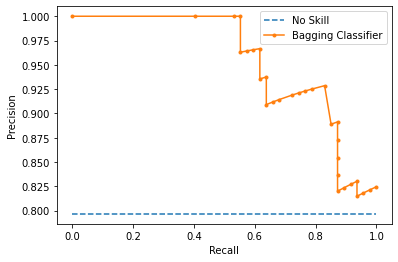

In [63]:
# predicting probabilities
bag_parallel_probs = bag_parallel.predict_proba(x_test_1)
# keeping probabilities for the positive outcome only
bag_parallel_probs = bag_parallel_probs[:, 1]
# predicting class values
yhat = bag_parallel.predict(x_test_1)
bag_parallel_precision, bag_parallel_recall, _ = precision_recall_curve(y_test, bag_parallel_probs)
bag_parallel_f1, bag_parallel_auc = f1_score(y_test, yhat), auc(bag_parallel_recall, bag_parallel_precision)
# summarizing scores
print('Bagging: f1=%.3f auc=%.3f' % (bag_parallel_f1, bag_parallel_auc))
# plotting the precision-recall curves
no_skill_bag_parallel = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill_bag_parallel, no_skill_bag_parallel], linestyle='--', label='No Skill')
plt.plot(bag_parallel_recall, bag_parallel_precision, marker='.', label='Bagging Classifier')
plt.xlabel('Recall')
plt.ylabel('Precision')
# showing the legend
plt.legend()
# showing the plot
plt.show()

#### Step 7: Evaluating the model skill of AdaBoosting Classifier algo:

####  1. Precision-Recall graph:

AdaBoosting: f1=0.903 auc=0.946


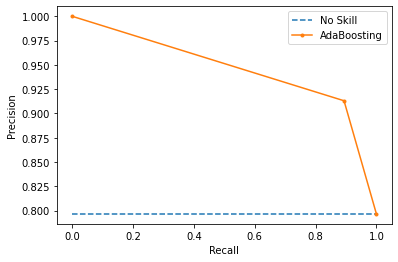

In [67]:
# predicting probabilities
boost_ada_seq_probs = boost_ada_seq.predict_proba(x_test_1)
# keeping probabilities for the positive outcome only
boost_ada_seq_probs = boost_ada_seq_probs[:, 1]
# predicting class values
yhat = boost_ada_seq.predict(x_test_1)
boost_ada_seq_precision, boost_ada_seq_recall, _ = precision_recall_curve(y_test, boost_ada_seq_probs)
boost_ada_seq_f1, boost_ada_seq_auc = f1_score(y_test, yhat), auc(boost_ada_seq_recall, boost_ada_seq_precision)
# summarizing scores
print('AdaBoosting: f1=%.3f auc=%.3f' % (boost_ada_seq_f1, boost_ada_seq_auc))
# plotting the precision-recall curves
no_skill_boost_ada_seq = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill_boost_ada_seq, no_skill_GN], linestyle='--', label='No Skill')
plt.plot(boost_ada_seq_recall, boost_ada_seq_precision, marker='.', label='AdaBoosting')
plt.xlabel('Recall')
plt.ylabel('Precision')
# showing the legend
plt.legend()
# showing the plot
plt.show()

#### Step 8:Evaluating the model skill of Support Vector algo:

####  1. Precision-Recall graph:

Support Vectors: f1=0.925 auc=0.953


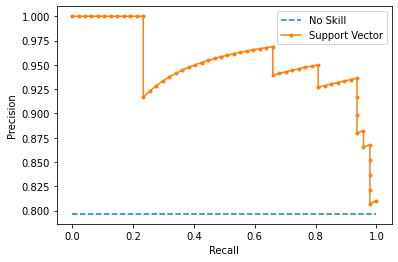

In [69]:
# predicting probabilities
supp_vec_probs = supp_vec.predict_proba(x_test_1)
# keeping probabilities for the positive outcome only
supp_vec_probs = supp_vec_probs[:, 1]
# predicting class values
yhat = supp_vec.predict(x_test_1)
supp_vec_precision, supp_vec_recall, _ = precision_recall_curve(y_test, supp_vec_probs)
supp_vec_f1, supp_vec_auc = f1_score(y_test, yhat), auc(supp_vec_recall, supp_vec_precision)
# summarizing scores
print('Support Vectors: f1=%.3f auc=%.3f' % (supp_vec_f1, supp_vec_auc))
# plotting the precision-recall curves
no_skill_supp_vec = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill_supp_vec, no_skill_supp_vec], linestyle='--', label='No Skill')
plt.plot(supp_vec_recall, supp_vec_precision, marker='.', label='Support Vector')
plt.xlabel('Recall')
plt.ylabel('Precision')
# showing the legend
plt.legend()
# showing the plot
plt.show()

#### Step 9: Evaluating the model skill of Stacking Classifier:

####  1. Precision-Recall graph:

Stacking Classifier: f1=0.894 auc=0.934


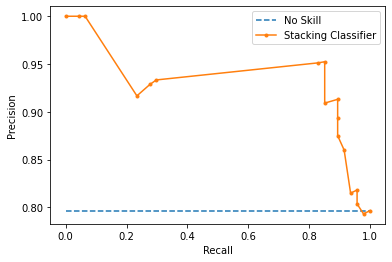

In [15]:
#Training the model:
stack_cl = stac_cl.fit(x_train_1,y_train)
# predicting probabilities
stack_cl_probs = stack_cl.predict_proba(x_test_1)
# keeping probabilities for the positive outcome only
stack_cl_probs = stack_cl_probs[:, 1]
# predicting class values
yhat = stack_cl.predict(x_test_1)
stack_cl_precision, stack_cl_recall, _ = precision_recall_curve(y_test, stack_cl_probs)
stack_cl_f1, stack_cl_auc = f1_score(y_test, yhat), auc(stack_cl_recall, stack_cl_precision)
# summarizing scores
print('Stacking Classifier: f1=%.3f auc=%.3f' % (stack_cl_f1, stack_cl_auc))
# plotting the precision-recall curves
no_skill_stack_cl = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill_stack_cl, no_skill_stack_cl], linestyle='--', label='No Skill')
plt.plot(stack_cl_recall, stack_cl_precision, marker='.', label='Stacking Classifier')
plt.xlabel('Recall')
plt.ylabel('Precision')
# showing the legend
plt.legend()
# showing the plot
plt.show()

#### Combined Inference on the outputs from model skill evaluation in steps 1, 2 &3:

1. A skilled model in the Precision-Recall graph is indicated as plot bowed at (1,1).
2. In Our above Graphs Random Forest model as the plot bowing toward (1,1) but not bowed at (1,1).
3. Also among above the plots it can be observed that area under the curve is more for the Random Forest model.

            Therefore, it can be seen that the logistic regression model is well skilled. A good skilled model is one that assigns higher probablity values to randomly choosen real positive occurence than a negative occurence on average. Let us also come to final conclusion based on the performance measurement using the confusion matrix.

### 2. Compring the model performance using the Confusion Matrix:

#### Confusion Matrix of the models built using Logistic Regression, K Nearest Neighbours and Naive Baye's algos:

##### a.Logistic Regression

[[ 7  5]
 [ 7 40]]


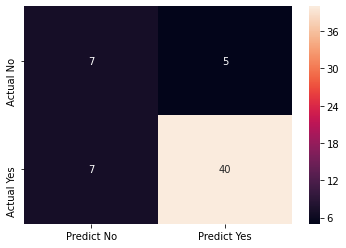

In [80]:
lr_cm = metrics.confusion_matrix(y_test, y_predict_testing_LR) #Formulatting the confusion matrix using inbuilt function of sklearn.
print(lr_cm)
lr_df_cm = pd.DataFrame(lr_cm, index =[i for i in ["Actual No","Actual Yes"]] , columns = [i for i in ["Predict No","Predict Yes"]])
sns.heatmap(lr_df_cm, annot=True,fmt= 'd') #Visualizing the Confusion matrix

In [72]:
print(metrics.classification_report(y_test, y_predict_testing_LR)) #Extracting the classifcication report.

              precision    recall  f1-score   support

           0       0.50      0.58      0.54        12
           1       0.89      0.85      0.87        47

    accuracy                           0.80        59
   macro avg       0.69      0.72      0.70        59
weighted avg       0.81      0.80      0.80        59



In [73]:
LR_f1= f1_score(y_test, y_predict_testing_LR) #Extracting the F1 Score.
LR_f1

0.8695652173913044

##### Inference on the above outputs:
1. F1 measure = 86.95%
    

##### b.KNN:

[[ 6  6]
 [ 3 44]]


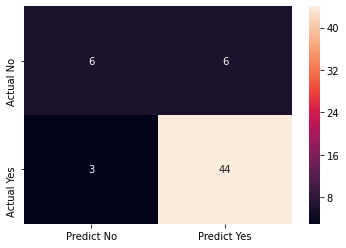

In [78]:
knn_cm = metrics.confusion_matrix(y_test, y_test_pred_knn) #Formulatting the confusion matrix using inbuilt function of sklearn
print(knn_cm)
knn_df_cm = pd.DataFrame(knn_cm, index =[i for i in ["Actual No","Actual Yes"]] , columns = [i for i in ["Predict No","Predict Yes"]])
sns.heatmap(knn_df_cm, annot=True,fmt= 'd') #Visualizing the Confusion matrix

In [62]:
print(metrics.classification_report(y_test, y_test_pred_knn)) #Extracting the classifcication report.

              precision    recall  f1-score   support

           0       0.67      0.50      0.57        12
           1       0.88      0.94      0.91        47

    accuracy                           0.85        59
   macro avg       0.77      0.72      0.74        59
weighted avg       0.84      0.85      0.84        59



In [77]:
knn_f1= f1_score(y_test, y_test_pred_knn) #Extracting the F1 Score.
knn_f1

0.9072164948453608

##### Inference on the above outputs:
1.. F1 measure = 90.72%
    

##### c.Naive bayes:

[[10  2]
 [20 27]]


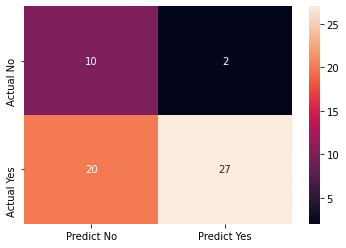

In [81]:
GN_cm = metrics.confusion_matrix(y_test, y_test_pred__GN) #Formulatting the confusion matrix using inbuilt function of sklearn.
print(GN_cm)
GN_df_cm = pd.DataFrame(GN_cm, index =[i for i in ["Actual No","Actual Yes"]] , columns = [i for i in ["Predict No","Predict Yes"]])
sns.heatmap(GN_df_cm, annot=True,fmt= 'd')#Visualizing the Confusion matrix

In [65]:
print(metrics.classification_report(y_test,y_test_pred__GN)) #Extracting the classifcication report.

              precision    recall  f1-score   support

           0       0.33      0.83      0.48        12
           1       0.93      0.57      0.71        47

    accuracy                           0.63        59
   macro avg       0.63      0.70      0.59        59
weighted avg       0.81      0.63      0.66        59



In [66]:
GN_f1= f1_score(y_test, y_test_pred__GN) #Extracting the F1 Score.
GN_f1

0.7105263157894737

##### Inference on the above outputs:
1. F1 measure = 71.05%
    

##### c.Decission Tree:

[[ 8  4]
 [ 5 42]]


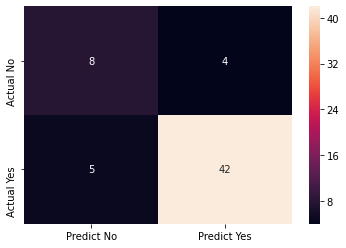

In [76]:
dt_cm = metrics.confusion_matrix(y_test, y_test_pred_dt) #Formulatting the confusion matrix using inbuilt function of sklearn.
print(dt_cm)
dt_df_cm = pd.DataFrame(dt_cm, index =[i for i in ["Actual No","Actual Yes"]] , columns = [i for i in ["Predict No","Predict Yes"]])
sns.heatmap(dt_df_cm, annot=True,fmt= 'd')#Visualizing the Confusion matrix

In [135]:
print(metrics.classification_report(y_test,y_test_pred_dt)) #Extracting the classifcication report.

              precision    recall  f1-score   support

           0       0.62      0.67      0.64        12
           1       0.91      0.89      0.90        47

    accuracy                           0.85        59
   macro avg       0.76      0.78      0.77        59
weighted avg       0.85      0.85      0.85        59



In [84]:
dtree_f1= f1_score(y_test, y_test_pred_dt) #Extracting the F1 Score.
dtree_f1

0.9032258064516129

##### Inference on the above outputs:
1. F1 measure = 90.32%
    

##### c.Random Forest:

[[ 7  5]
 [ 6 41]]


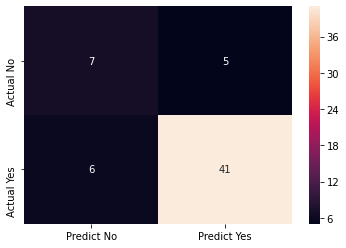

In [82]:
raf_cm = metrics.confusion_matrix(y_test, y_test_pred_raf) #Formulatting the confusion matrix using inbuilt function of sklearn.
print(raf_cm)
raf_df_cm = pd.DataFrame(raf_cm, index =[i for i in ["Actual No","Actual Yes"]] , columns = [i for i in ["Predict No","Predict Yes"]])
sns.heatmap(raf_df_cm, annot=True,fmt= 'd')#Visualizing the Confusion matrix

In [138]:
print(metrics.classification_report(y_test,y_test_pred_raf)) #Extracting the classifcication report.

              precision    recall  f1-score   support

           0       0.54      0.58      0.56        12
           1       0.89      0.87      0.88        47

    accuracy                           0.81        59
   macro avg       0.71      0.73      0.72        59
weighted avg       0.82      0.81      0.82        59



In [85]:
raf_f1= f1_score(y_test, y_test_pred_raf) #Extracting the F1 Score.
raf_f1

0.8817204301075269

##### Inference on the above outputs:
1. F1 measure = 88.17%
    

##### c.Bagging Classifier:

[[ 6  6]
 [ 6 41]]


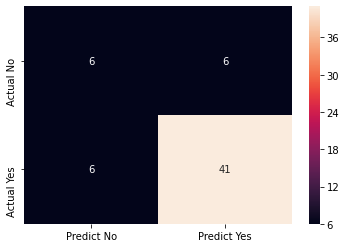

In [83]:
bag_cm = metrics.confusion_matrix(y_test, y_test_pred_bag_parallel) #Formulatting the confusion matrix using inbuilt function of sklearn.
print(bag_cm)
bag_df_cm = pd.DataFrame(bag_cm, index =[i for i in ["Actual No","Actual Yes"]] , columns = [i for i in ["Predict No","Predict Yes"]])
sns.heatmap(bag_df_cm, annot=True,fmt= 'd')#Visualizing the Confusion matrix

In [141]:
print(metrics.classification_report(y_test,y_test_pred_bag_parallel)) #Extracting the classifcication report.

              precision    recall  f1-score   support

           0       0.50      0.50      0.50        12
           1       0.87      0.87      0.87        47

    accuracy                           0.80        59
   macro avg       0.69      0.69      0.69        59
weighted avg       0.80      0.80      0.80        59



In [86]:
bag_f1= f1_score(y_test, y_test_pred_bag_parallel) #Extracting the F1 Score.
bag_f1

0.8723404255319149

##### Inference on the above outputs:
1. F1 measure = 87.23%
    

##### c.Boosting Classifier:

[[ 8  4]
 [ 5 42]]


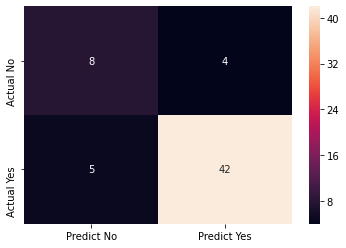

In [87]:
boost_cm = metrics.confusion_matrix(y_test, y_test_pred_boost_ada_seq) #Formulatting the confusion matrix using inbuilt function of sklearn.
print(boost_cm)
boost_df_cm = pd.DataFrame(boost_cm, index =[i for i in ["Actual No","Actual Yes"]] , columns = [i for i in ["Predict No","Predict Yes"]])
sns.heatmap(boost_df_cm, annot=True,fmt= 'd')#Visualizing the Confusion matrix

In [88]:
print(metrics.classification_report(y_test,y_test_pred_boost_ada_seq)) #Extracting the classifcication report.

              precision    recall  f1-score   support

           0       0.62      0.67      0.64        12
           1       0.91      0.89      0.90        47

    accuracy                           0.85        59
   macro avg       0.76      0.78      0.77        59
weighted avg       0.85      0.85      0.85        59



In [89]:
boost_f1= f1_score(y_test, y_test_pred_boost_ada_seq) #Extracting the F1 Score.
boost_f1

0.9032258064516129

##### Inference on the above outputs:
1. F1 measure = 90.32%
    

##### c.Support Vector Classifier:

[[ 9  3]
 [ 4 43]]


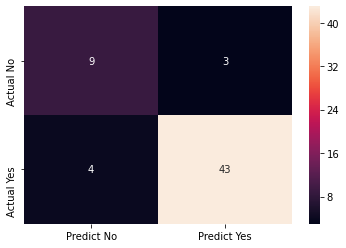

In [90]:
svc_cm = metrics.confusion_matrix(y_test, y_test_pred_supp_vec) #Formulatting the confusion matrix using inbuilt function of sklearn.
print(svc_cm)
svc_df_cm = pd.DataFrame(svc_cm, index =[i for i in ["Actual No","Actual Yes"]] , columns = [i for i in ["Predict No","Predict Yes"]])
sns.heatmap(svc_df_cm, annot=True,fmt= 'd')#Visualizing the Confusion matrix

In [91]:
print(metrics.classification_report(y_test,y_test_pred_supp_vec)) #Extracting the classifcication report.

              precision    recall  f1-score   support

           0       0.69      0.75      0.72        12
           1       0.93      0.91      0.92        47

    accuracy                           0.88        59
   macro avg       0.81      0.83      0.82        59
weighted avg       0.89      0.88      0.88        59



In [92]:
supp_f1= f1_score(y_test, y_test_pred_supp_vec) #Extracting the F1 Score.
supp_f1

0.924731182795699

##### Inference on the above outputs:
1. F1 measure = 92.4%
    

##### c.Stacking Classifier:

[[ 0 12]
 [ 0 47]]


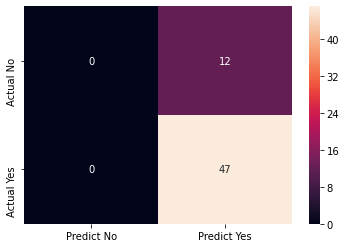

In [19]:
y_test_pred_stack_cl = stack_cl.predict(x_test)
stack_cl_cm = metrics.confusion_matrix(y_test, y_test_pred_stack_cl) #Formulatting the confusion matrix using inbuilt function of sklearn.
print(stack_cl_cm)
stack_cl_df_cm = pd.DataFrame(stack_cl_cm, index =[i for i in ["Actual No","Actual Yes"]] , columns = [i for i in ["Predict No","Predict Yes"]])
sns.heatmap(stack_cl_df_cm, annot=True,fmt= 'd')#Visualizing the Confusion matrix

In [20]:
print(metrics.classification_report(y_test,y_test_pred_stack_cl)) #Extracting the classifcication report.

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.80      1.00      0.89        47

    accuracy                           0.80        59
   macro avg       0.40      0.50      0.44        59
weighted avg       0.63      0.80      0.71        59



In [22]:
stack_cl_f1= f1_score(y_test,y_test_pred_stack_cl) #Extracting the F1 Score.
stack_cl_f1

0.8867924528301886

##### Inference on the above outputs:
1. F1 measure = 88.6%
    

##### Combined Inferences on above Confusion matrices:

1. As mentioned previously important performance measure for our case is F1 measure.
2. It can be found from above confusion matrices that F1 measure  of Support Vector Classifier which is 92.5% seems to be better than F1 measures of other algorithms.  

##### Combined Inferences on above model skill evaluation and Confusion matrices:

1. Based on the F1 measure fetched from confusion matrix it can be said that Support Vector Classifier is the best model but it should be taken into notice the skill of the model to assign higher probability to randomly choosen real positive occurence than a negative occurence on average according to that Random Forest have higher skill compared to all other models so it we can say for clinical case Random forest might be the best model.   

### Conclusion:

1. Initially the given data was understood using the all Exploratory Data Analytics.
2. Using the understanding unnecessary columns were dropped.
3. The data were split in the ratio 70:30 for training and testing data respectively.
4. Then, the models were built using the Logistic Regression, K Nearest Neighbours, Naive Baye's model, Decision Tree, Random Forest, Bagging, Boosting, Support Vector Classifier and Stacking Classifier.
5. Decision on the necessary performance measure to evaluate the model was decided as F1 measure.
6. The skill of the models were evaluated and it was found that Random Forest have very good skill is better than other models.
7. Then performance of the model was evaluated and found that Support Vector Classifier model had very good F1 measure performance.
8. But we might have got completely different results if following were done:
            1. Removing the Multicollinear vectors with domain knowledge or using the basic feature engineering.
            2. Removing the Outliers with domain knowledge because their presence might had influenced our algorithms.
            3. Removing the imbalance in the data by oversampling using SMOTE or undersampling.
            4. Our Logistic regression variables might have been made insensitive to the effect of muticollinearity by using lasso and ridge regressions.
            5. Our models can also be improved by still more tuning the Hyperparameters of the models.
            6. Using log or exponential transformation our the skewness effect can be reduced and eventually improve the model.
            7. In the above models tuning was done using the GridSearch, Redomgridsearch can also be tried and see is there any improvement in the model.
            8. As the feature importance was determined for Decission tress, we can see whether the all the other model improves if we pass only those important features as variables for training and testing.

=====================================================================================================================